# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования:** выяснить какие параметры влияют на стоимость квартиры.   
   
   Исследование пройдёт в несколько этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавление столбцов.
 4. Исследовательский анализ данных.
 5. Общий вывод.

## Откройте файл с данными и изучите общую информацию. 

In [9]:
# подключаем библиотеки pandas и matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# pandas показывает все колонки без усечения
pd.options.display.max_columns = None
# округляем значения до трех знаков после запятой
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.simplefilter('ignore')

In [10]:
    # загружаем данные из файла в датафрейм
    # данные разделены '\t', поэтому указываем табуляцию в параметре sep
    # выводим первые 10 строк
data = pd.read_csv('3. quarters_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00
5,10,2890000.00,30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000.00,37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,52996.00,19143.00,0.00,NaN,0.00,NaN,155.00
7,5,7915000.00,71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,23982.00,11634.00,0.00,NaN,0.00,NaN,NaN
8,20,2900000.00,33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000.00,61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,50898.00,15008.00,0.00,NaN,0.00,NaN,289.00


In [11]:
data.info() 
# выводим информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

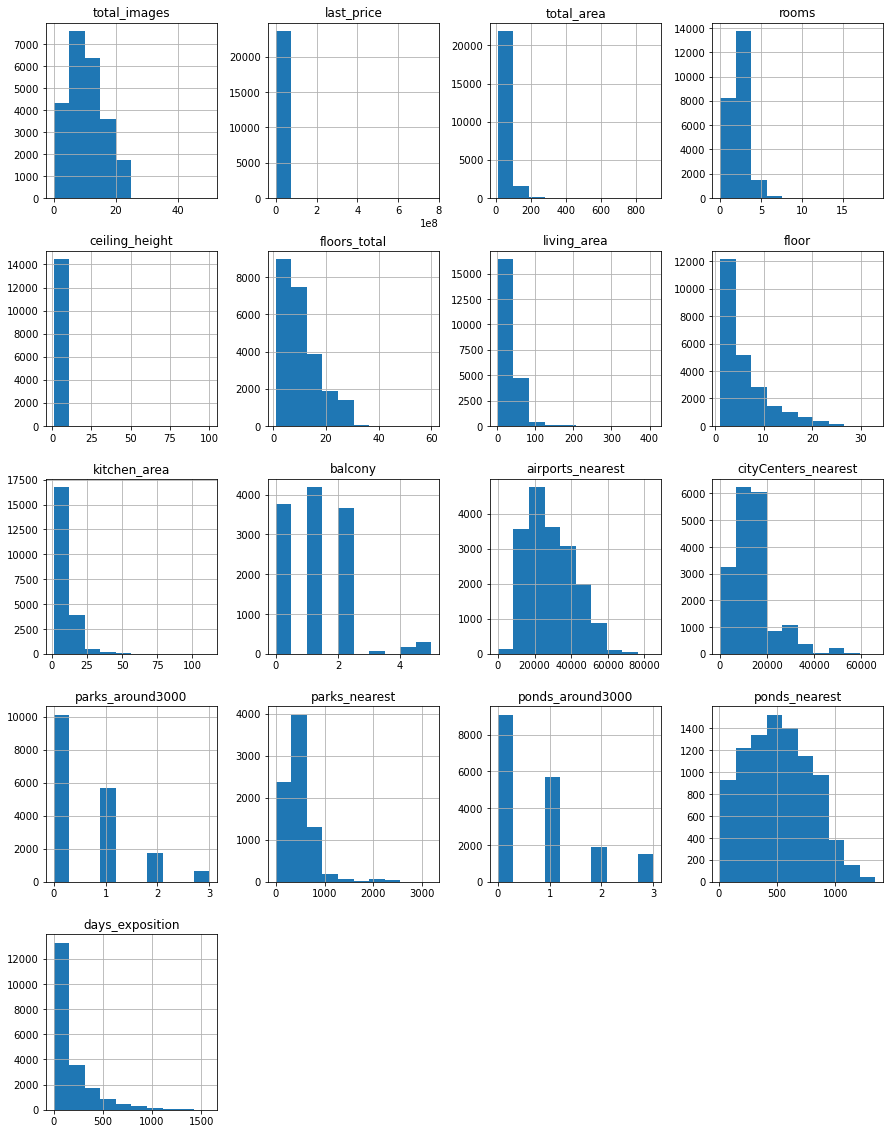

In [12]:
# строим гистограммы для всего датафрейма
data.hist(figsize=(15, 20))
plt.show()

In [13]:
# выводим список характерных значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,23699.00,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6541548.77,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,10887013.27,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4650000.00,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6800000.00,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<font color="blue" size="5">**Первоначальные выводы:**</font><br><br>
<font color="blue" size="4">*Взглянув на данные мы можем сделать следующие выводы:*</font>
+ В столбце "first_day_exposition" округленное время и неправильное отображение даты
+ Нужно исправить названия колонок ("cityCenters_nearest", "parks_around3000", "ponds_around3000")
+ У многих столбцов неправильный тип данных  
    + "is_apartment", например, должен иметь тип bool
    + "floors_total", "balcony", "last_price", "parks_around3000" и "ponds_around3000" - тип "int" (вряд ли рядом 1,5 парка или 3,5 этажа в доме)
    + "first_day_exposition" - тип "datetime"
+ немного пугает высота потолков (от 1 метра до 100)
+ очень много пропущенных значений
+ присутствуют выбросы

## Предобработка данных

### Стиль заголовков

In [14]:
# исправим названия столбцов
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest',
                           'parks_around3000': 'parks_around_3000',
                           'ponds_around3000': 'ponds_around_3000'})

### Пропуски значений

In [15]:
# определяем, в каких столбцах есть пропуски и считаем их
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
# посчитаем количество пропусков в процентах
data.isna().mean()*100
# ну или data.isna().sum() / len(data) * 100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height         38.80
floors_total            0.36
living_area             8.03
floor                   0.00
is_apartment           88.29
studio                  0.00
open_plan               0.00
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
city_centers_nearest   23.29
parks_around_3000      23.28
parks_nearest          65.91
ponds_around_3000      23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

**У нас два столбца "locality_name" и "floors_total" с пропущенными значениями менее 1%, ими можно пренебречь. К тому же мы даже не знаем где находится квартира, а стоимость квартиры очень зависит     от населённого пункта, где расположена.**

In [17]:
# удаляем строки с пропущенными значениями в "locality_name" и "floors_total"
data = data.dropna(subset=['locality_name', 'floors_total'])

**Значения в столбце "is_apartment" показывают является ли квартира апартаментами или нет. Можем предположить, что если не указан тип, то, скорее всего, квартира апартаментами не является.**

In [18]:
# заполним пропуски в "is_apartment"
data['is_apartment'] = data['is_apartment'].fillna(False)

**Пропуски в столбце "balcony", показывают,что, скорее всего, в квартире балкон отсутствует. Поэтому заполним пропуски нулями. При заполнении, скорее всего, продавец не посчитал важным заполнить этот столбец. Пропуски в столбце "days_exposition" оставим без изменений (ведь мы не знаем сколько дней было размещено объявление и найти его даже примерно, не представляется возможным).**

In [19]:
data['balcony'] = data['balcony'].fillna(0)

**Пропуски в столбце "ceiling_height" заполним медианным значением относительно населённого пункта. Медианное значение при вызове describe() выглядит вполне нормально. Пропуски в столбцах "ponds_around_3000", "parks_around_3000" заполним медианным значением относительно населённого пункта (в которых либо есть водоёмы с парками, либо нет). Столбцы 'airports_nearest', 'parks_nearest', 'ponds_nearest' мы также заполним медианным значением относительно населённого пункта (ведь расстояние до объекта зависит от того, где ты находишся).**

In [20]:
# создадим список для колонок
col_median_loc = ['ceiling_height',
                  'ponds_around_3000',
                  'parks_around_3000',
                  'airports_nearest',
                  'parks_nearest',
                  'ponds_nearest']
# проверим количество пропусков
data[col_median_loc].isna().sum()

ceiling_height        9084
ponds_around_3000     5500
parks_around_3000     5500
airports_nearest      5524
parks_nearest        15535
ponds_nearest        14529
dtype: int64

In [21]:
# перебор названий столбцов в цикле и замена пропущенных значений на медиану относительно 'locality_name'
for column, value  in data[col_median_loc].iteritems():
    for i in data['locality_name'].unique():
        data.loc[(data['locality_name'] == i) & (value.isna()), column] = \
        data.loc[(data['locality_name'] == i), column].median()

In [22]:
# проверим количество пропусков
data[col_median_loc].isna().sum()

ceiling_height        120
ponds_around_3000    5432
parks_around_3000    5432
airports_nearest     5432
parks_nearest        5986
ponds_nearest        5517
dtype: int64

In [23]:
# оставшиеся пропуски заменим медианой всего столбца и проверим
for col in col_median_loc:
    data.loc[data[col].isna(), col] = data[col].median()
data[col_median_loc].isna().sum()

ceiling_height       0
ponds_around_3000    0
parks_around_3000    0
airports_nearest     0
parks_nearest        0
ponds_nearest        0
dtype: int64

**Пропуски в столбцах "living_area" и "kitchen_area" заменим на медиану, относительно количества комнат в квартире ( можно сказать, что это категоризация обшей площади))) ).**

In [24]:
# создадим список для колонок
col_median_rooms = ['living_area', 'kitchen_area']
# проверим количество пропусков
data[col_median_rooms].isna().sum()

living_area     1865
kitchen_area    2222
dtype: int64

In [25]:
# перебор названий столбцов в цикле и замена пропущенных значений на медиану относительно 'rooms'
for column, value  in data[col_median_rooms].iteritems():
    for i in data['rooms'].unique():
        data.loc[(data['rooms'] == i) & (value.isna()), column] = \
        data.loc[(data['rooms'] == i), column].median()
# проверим количество пропусков
data[col_median_rooms].isna().sum()

living_area       0
kitchen_area    194
dtype: int64

In [26]:
# оставшиеся пропуски заменим медианой всего столбца и проверим
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = data['kitchen_area'].median()
data.isna().mean()*100

total_images            0.00
last_price              0.00
total_area              0.00
first_day_exposition    0.00
rooms                   0.00
ceiling_height          0.00
floors_total            0.00
living_area             0.00
floor                   0.00
is_apartment            0.00
studio                  0.00
open_plan               0.00
kitchen_area            0.00
balcony                 0.00
locality_name           0.00
airports_nearest        0.00
city_centers_nearest   23.34
parks_around_3000       0.00
parks_nearest           0.00
ponds_around_3000       0.00
ponds_nearest           0.00
days_exposition        13.46
dtype: float64

### Изменение типов данных   
**При изучении общей информации о данных, мы уже видели, что у многих столбцов неправильный тип данных. Нет смысла отображать цену на квартиру с точностью до копейки, например. Или количество парков в числах с плавающей точкой. Сейчас мы это иправим.** 

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23565 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

**Мы изменим тип данных для столбцов:**
   + "floors_total" - int 
   + "last_price" - int
   + "balcony" - int   
   + "parks_around_3000" - int
   + "ponds_around_3000" - int
   + "first_day_exposition" - datetime

In [28]:
# создаём список столбцов, в которых нужно изменить тип данных на int
list_type = ['floors_total', 'last_price', 'balcony', 'parks_around_3000', 'ponds_around_3000']
# к этому списку применяем метод astype
data[list_type] = data[list_type].astype(int)
# проверяем тип данных в этих столбцах
data[list_type].dtypes

floors_total         int32
last_price           int32
balcony              int32
parks_around_3000    int32
ponds_around_3000    int32
dtype: object

In [29]:
# изменим тип данных для "first_day_exposition"
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверим тип данных
data.dtypes

total_images                     int64
last_price                       int32
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int32
locality_name                   object
airports_nearest               float64
city_centers_nearest           float64
parks_around_3000                int32
parks_nearest                  float64
ponds_around_3000                int32
ponds_nearest                  float64
days_exposition                float64
dtype: object

### Обработка дубликатов

**Сначала мы проверим данные на наличие явных дубликатов, а затем изучим уникальные значения в столбце с названиями и устраним неявные дубликаты.**

In [30]:
data.duplicated().sum()

0

**Явных дубликатов не найдено.**

In [31]:
# считаем количество уникальныз значений в столбце locality_name
data['locality_name'].nunique()

364

In [32]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

**Мы видим повторяющиеся названия "поселок" и "посёлок". Заменим "ё" на "е" и посчитаем значения.**

In [33]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].nunique()

330

**Мы сократили уникальные значения на 34.**

**Но в списке остались ещё повторяющиеся названия, например: "поселок станции Вещево" и "поселок при железнодорожной станции Вещево", "городской поселок Советский" и "поселок городского типа Советский". Чтобы это исправить мы оставим в названиях типы населённых пунктов: поселок, деревня, село, садовое товарищество.**

In [34]:
# создаём список слов, которые мы удалим из "locality_name"
words_del = ['городской',
             'типа',
             'городского',
             'станции',
             'железнодорожной',
             'при',
             'некоммерческое',
             'коттеджный']

lst_local = data['locality_name']  # создаём список, которому присваиваем значения из столбца "locality_name"
result_lst_local = []      # создаём результирующий список
for row in lst_local:      # проходим циклом по злементам списка (строкам data['locality_name'])    
    items = row.split()    # разделяем строку на слова по пробелам
    lst_local_items = []   # создаём список в который будем добавлять слова, если они не в списке words_del    
    for word in items:     # проходим циклом по разделенным словам
        if word not in words_del:
            lst_local_items.append(word)
                                                                # в результирующий список добавляем, соединённые 
    result_lst_local.append(' '.join(lst_local_items))          # в строку слова после фильтрации
data['locality_name'] = result_lst_local  # присваиваем столбцу "locality_name" обновленные значения

In [35]:
# посчитаем количество значений
data['locality_name'].nunique()

318

In [36]:
# и ещё раз выводим уникальные значения
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

### Обработка аномальных значений   
**В данных могут встречаться аномальные значения, которые не отражают действительность и появились по какой-то ошибке, а также редкие и выбивающиеся значения.**

In [37]:
# ещё раз выводим список характерных значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,23565.00,18064.00,23565.00,23565.00,23565.00,23565.00,20394.00
mean,9.88,6540058.26,60.32,2.07,2.73,10.68,34.32,5.88,10.44,0.59,28321.63,14192.66,0.47,471.86,0.82,509.07,180.74
std,5.68,10910934.72,35.66,1.08,1.01,6.59,21.72,4.87,5.64,0.96,11091.05,8613.35,0.75,203.07,0.83,174.94,219.73
min,0.00,12190.00,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3400000.00,40.00,1.00,2.55,5.00,18.40,2.00,7.30,0.00,21156.00,9238.00,0.00,460.00,0.00,504.00,45.00
50%,9.00,4646000.00,52.00,2.00,2.70,9.00,30.30,4.00,9.00,0.00,26763.00,13096.50,0.00,460.00,1.00,504.00,95.00
75%,14.00,6790000.00,69.70,3.00,2.70,16.00,42.70,8.00,11.50,1.00,34324.00,16285.00,1.00,460.00,1.00,504.00,231.00
max,50.00,763000000.00,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


+ столбец "total_images" - число фотографий квартиры макимально 50, вполне реально
+ столбец "last_price" - **рассмотреть подробнее**(стоимость квартиры 12190 р. ???)
+ столбец "total_area" - **рассмотреть подробнее** (площадь 12 кв.м ??? или 900 - это уже не квартира, скорее коттедж)
+ столбец "rooms" - **рассмотреть подробнее**(также смущает 19 комнат)
+ столбец "ceiling_height" - **рассмотреть подробнее**(потолки от 1 до 100)
+ столбец "floors_total" - **рассмотреть подробнее**(самое высокое жилое здание в Санкт-петербурге - 37 этажей!, К тому же у нас квартира с максимальным этажом - 33)
+ столбец "living_area" - **рассмотреть подробнее**(скорее всего есть несколько квартир с большой площадью, большим количеством комнат, возможно это коттеджи, которые попали в список квартир по ошибке)
+ столбец "floor" - этаж соответствует
+ столбец "kitchen_area" - **рассмотреть подробнее**(также смущает 112 кв. м)
+ столбец "balcony" - max 5 балконов. Вполне вероятно. Может двух- или трехуровневая квартира.
+ столбец "airports_nearest" - **рассмотреть подробнее**(min - 0, квартира в аэропорту???)
+ столбецы "city_centers_nearest", "parks_around_3000", "parks_nearest", "ponds_around_3000", "ponds_nearest", "days_exposition" - цифры вполне реальны, учитывая площадь области и разброс населённых пунктов. Объявление о продаже также может "висеть" 4 года. Немного только смущает 1 м до парка...

<font color="green" size="5">*Рассмотрим столбец "ceiling_height". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [38]:
data.sort_values(by='ceiling_height', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22869,0,15000000,25.00,2018-07-25,1,100.00,5,14.00,5,True,False,False,11.00,5,Санкт-Петербург,34963.00,8283.00,1,223.00,3,30.00,19.00
22336,19,9999000,92.40,2019-04-05,2,32.00,6,55.50,5,False,False,False,16.50,4,Санкт-Петербург,18838.00,3506.00,0,460.00,3,511.00,NaN
3148,14,2900000,75.00,2018-11-12,3,32.00,3,53.00,2,False,False,False,8.00,0,Волхов,26763.00,NaN,0,460.00,1,504.00,NaN
21377,19,4900000,42.00,2017-04-18,1,27.50,24,37.70,19,False,False,False,11.00,2,Санкт-Петербург,42742.00,9760.00,0,460.00,0,504.00,61.00
17857,1,3900000,56.00,2017-12-22,3,27.00,5,33.00,4,False,False,False,9.50,0,Санкт-Петербург,41030.00,15543.00,0,460.00,0,504.00,73.00
10773,8,3800000,58.00,2017-10-13,2,27.00,10,30.10,3,False,False,False,8.10,2,поселок Мурино,26763.00,NaN,0,460.00,1,504.00,71.00
2158,15,1500000,42.00,2017-12-23,2,27.00,2,29.00,2,False,False,False,5.50,0,деревня Мины,26763.00,NaN,0,460.00,1,504.00,NaN
20478,11,8000000,45.00,2017-07-18,1,27.00,4,22.00,2,False,False,False,10.00,1,Санкт-Петербург,18975.00,3246.00,0,460.00,3,449.00,429.00
21824,20,2450000,44.00,2019-02-12,2,27.00,2,38.00,2,False,False,False,8.60,2,поселок Большая Ижора,26763.00,NaN,0,460.00,1,504.00,NaN
4876,7,3000000,25.00,2017-09-27,0,27.00,25,17.00,17,False,False,True,9.00,2,поселок Мурино,26763.00,NaN,0,460.00,1,504.00,28.00


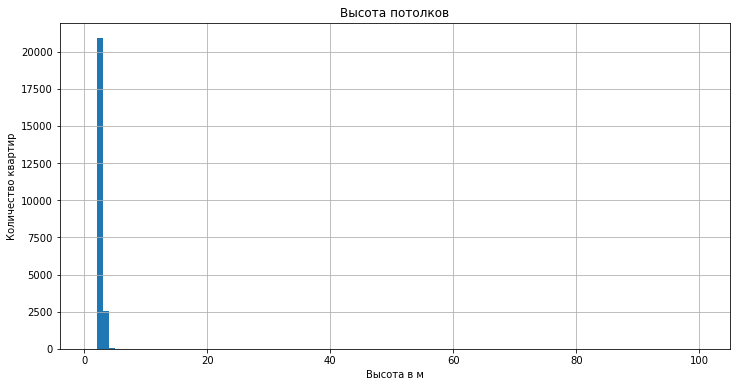

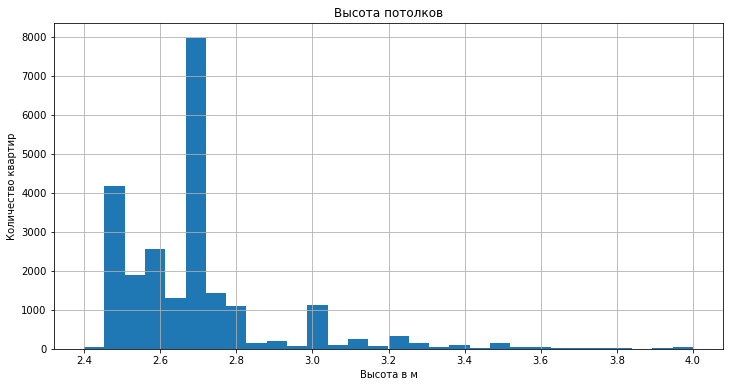

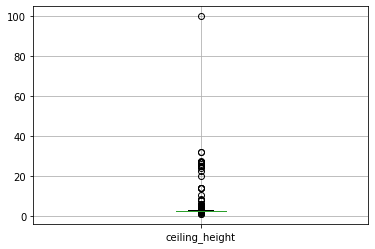

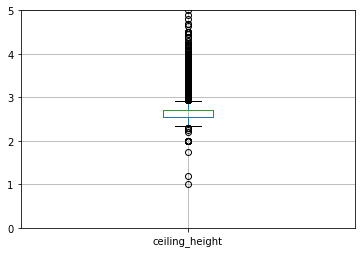

In [39]:
data['ceiling_height'].hist(bins=100, figsize=(12, 6))
plt.title('Высота потолков')
plt.xlabel('Высота в м')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].hist(bins=30, range=(2.4, 4), figsize=(12, 6))
plt.title('Высота потолков')
plt.xlabel('Высота в м')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('ceiling_height')
plt.show()
data.boxplot('ceiling_height')
plt.ylim(0, 5)
plt.show()

**У нас есть выбросы. Есть квартира с высотой 100 м. Есть квартиры менее 2,5 метров. Высота потолка должна быть не менее 2,5 м и максимум 4 м (в сталинских домах высота от 3 до 4 м). Квартиры выше 25 до 40 м могут быть ошибкой при заполнении (не поставили запятую). Разобьем на категории и посчитаем количество.**

In [40]:
print('Квартир менее 2,5 м:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('Квартиры от 2,5 до 4 м:', data.query('2.5 <= ceiling_height <= 4')['ceiling_height'].count())
print('Квартиры от 4 до 25 м:', data.query('4 < ceiling_height < 25')['ceiling_height'].count())
print('Квартиры то 25 до 40 м:', data.query('25 <= ceiling_height <= 40')['ceiling_height'].count())
print('Квартиры более 40 м:', data.query('ceiling_height > 40')['ceiling_height'].count())

Квартир менее 2,5 м: 73
Квартиры от 2,5 до 4 м: 23413
Квартиры от 4 до 25 м: 58
Квартиры то 25 до 40 м: 20
Квартиры более 40 м: 1


In [41]:
# У квартир то 25 до 40 м делим значения на 10
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x/10 if 40 >= x >=25 else x)

In [42]:
print('Квартир менее 2,5 м:', data.query('ceiling_height < 2.5')['ceiling_height'].count())
print('Квартиры от 2,5 до 4 м:', data.query('2.5 <= ceiling_height <= 4')['ceiling_height'].count())
print('Квартиры от 4 до 25 м:', data.query('4 < ceiling_height < 25')['ceiling_height'].count())
print('Квартиры то 25 до 40 м:', data.query('25 <= ceiling_height <= 40')['ceiling_height'].count())
print('Квартиры более 40 м:', data.query('ceiling_height > 40')['ceiling_height'].count())

Квартир менее 2,5 м: 73
Квартиры от 2,5 до 4 м: 23433
Квартиры от 4 до 25 м: 58
Квартиры то 25 до 40 м: 0
Квартиры более 40 м: 1


In [43]:
# посчитаем количество строк
len(data)

23565

**Теперь удалим все значения, которые не входят в диапазон 2,5 - 4. Это 0,5%.**

In [44]:
data = data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 4)]
# ещё раз проверим 
data['ceiling_height'].describe()

count   23433.00
mean        2.70
std         0.21
min         2.50
25%         2.55
50%         2.70
75%         2.70
max         4.00
Name: ceiling_height, dtype: float64

<font color="green" size="5">*Рассмотрим столбец "floors_total".*</font>

**Посчитаем количество квартир выше 37 этажа**

In [45]:
data.query('floors_total > 37')['floors_total'].count()

2

In [46]:
# посмотрим на эти квартиры
data.query('floors_total > 37')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45.50,2018-06-28,2,2.88,60,27.40,4,False,False,False,7.40,0,Кронштадт,67763.00,49488.00,2,342.00,3,614.00,166.00
16731,9,3978000,40.00,2018-09-24,1,2.65,52,10.50,18,False,False,False,14.00,0,Санкт-Петербург,20728.00,12978.00,1,793.00,0,504.00,45.00


**Да уж, квартиры в доме про который никто не знает). Удалим строки, где значения выше 33 этажа без сожалений.**

In [47]:
data = data.query('floors_total <= 37')
# проверим количество строк
len(data)

23431

<font color="green" size="5">*Рассмотрим столбец "rooms". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [48]:
data.sort_values(by='rooms', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14498,6,32250000,374.60,2018-06-09,19,2.70,5,264.50,2,False,False,False,27.60,0,Санкт-Петербург,19497.00,3574.00,0,460.00,2,548.00,114.00
18848,6,28500000,270.00,2015-03-02,16,3.00,4,180.00,4,False,False,False,13.00,1,Санкт-Петербург,23575.00,4142.00,1,516.00,0,504.00,1365.00
5358,20,65000000,590.00,2019-02-14,15,3.50,6,409.00,3,False,False,False,100.00,0,Санкт-Петербург,24447.00,4666.00,1,767.00,0,504.00,14.00
866,5,25000000,363.00,2017-12-23,14,3.16,5,222.00,4,False,False,False,16.60,0,Санкт-Петербург,38076.00,7950.00,0,460.00,2,435.00,418.00
20829,6,28659000,245.40,2016-03-31,14,2.70,4,168.30,2,False,False,False,25.90,0,Санкт-Петербург,21104.00,2054.00,3,541.00,2,118.00,95.00
19540,8,420000000,900.00,2017-12-06,12,2.80,25,409.70,25,False,False,False,112.00,0,Санкт-Петербург,30706.00,7877.00,0,460.00,2,318.00,106.00
648,3,17500000,183.70,2018-07-01,11,3.40,7,138.80,7,False,False,False,13.30,0,Санкт-Петербург,23606.00,3148.00,0,460.00,0,504.00,NaN
9688,8,33000000,194.10,2017-02-07,11,3.43,5,129.00,2,False,False,False,11.90,0,Санкт-Петербург,21469.00,1015.00,1,686.00,2,66.00,813.00
18119,4,15500000,216.10,2016-07-04,10,3.15,5,161.40,2,False,False,False,19.80,0,Санкт-Петербург,24353.00,4921.00,1,368.00,0,504.00,11.00
4149,6,23000000,272.60,2018-01-11,10,3.14,7,145.90,7,False,False,False,18.80,1,Санкт-Петербург,10726.00,12169.00,1,191.00,1,531.00,NaN


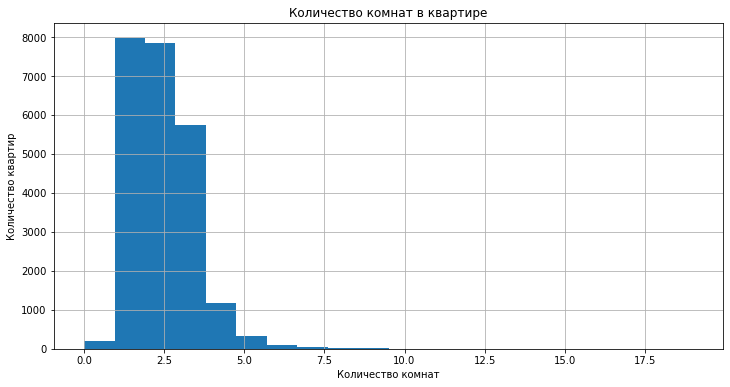

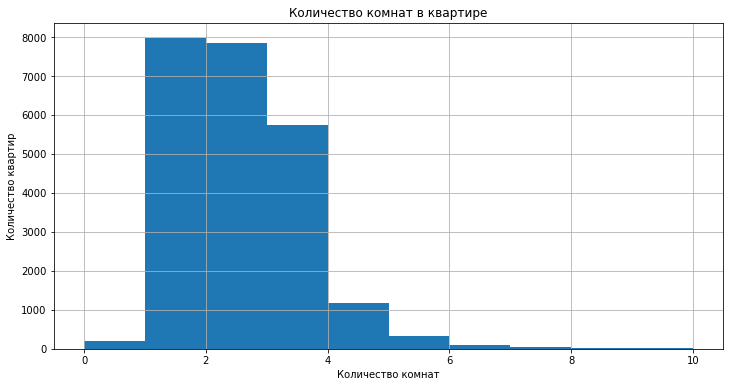

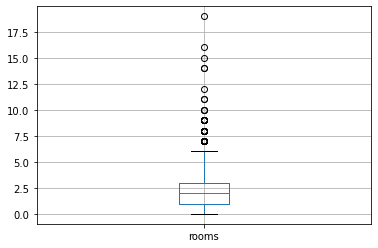

(0.0, 10.0)

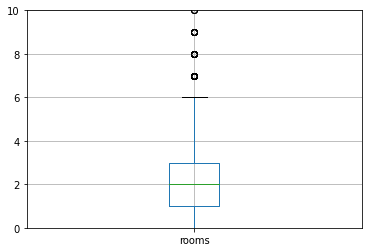

In [49]:
data['rooms'].hist(bins=20, figsize=(12, 6))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].hist(bins=10, range=(0, 10), figsize=(12, 6))
plt.title('Количество комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('rooms')
plt.show()
data.boxplot('rooms')
plt.ylim(0, 10)

**Квартиры с нулевым значением могут быть студиями или квартирами со свободной планировкой. На графике мы видим, что значение на отметке 9 пропадает. Посчитаем количество квартир с комнатами более 9.**

In [50]:
data.query('rooms > 9')['rooms'].count()

11

**Удалим аномальные значения (строки, где значения выше 9 комнат).**

In [51]:
data = data.query('rooms <= 9')
# проверим количество строк
len(data)

23420

<font color="green" size="5">*Рассмотрим столбец "last_price". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [52]:
data.sort_values(by='last_price', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000,400.00,2017-09-30,7,2.70,10,250.00,10,False,False,False,20.00,2,Санкт-Петербург,25108.00,3956.00,1,530.00,3,756.00,33.00
14706,15,401300000,401.00,2016-02-20,5,2.70,9,204.00,9,False,False,False,24.00,3,Санкт-Петербург,21912.00,2389.00,1,545.00,1,478.00,393.00
1436,19,330000000,190.00,2018-04-04,3,3.50,7,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.00,1197.00,3,519.00,3,285.00,233.00
15651,20,300000000,618.00,2017-12-18,7,3.40,7,258.00,5,False,False,False,70.00,0,Санкт-Петербург,32440.00,5297.00,0,460.00,2,198.00,111.00
22831,18,289238400,187.50,2019-03-19,2,3.37,6,63.70,6,False,False,False,30.20,0,Санкт-Петербург,22494.00,1073.00,3,386.00,3,188.00,NaN
16461,17,245000000,285.70,2017-04-10,6,3.35,7,182.80,4,False,False,False,29.80,0,Санкт-Петербург,33143.00,6235.00,3,400.00,3,140.00,249.00
13749,7,240000000,410.00,2017-04-01,6,3.40,7,218.00,7,False,False,False,40.00,0,Санкт-Петербург,32440.00,5297.00,0,460.00,2,198.00,199.00
5893,3,230000000,500.00,2017-05-31,6,2.70,7,124.40,7,False,False,False,40.00,0,Санкт-Петербург,32440.00,5297.00,0,460.00,2,198.00,50.00
8900,13,190870000,268.00,2016-03-25,3,2.70,8,132.00,7,False,False,False,40.00,0,Санкт-Петербург,32440.00,5297.00,0,460.00,2,198.00,901.00
19865,20,180000000,347.00,2015-01-21,8,3.90,6,260.00,3,False,False,False,45.00,0,Санкт-Петербург,23962.00,3794.00,2,537.00,3,501.00,834.00


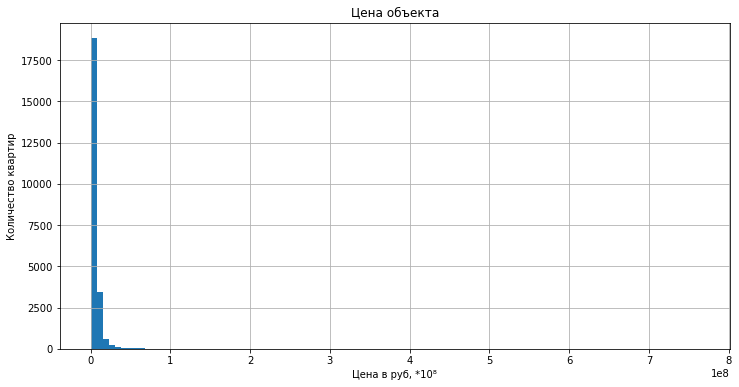

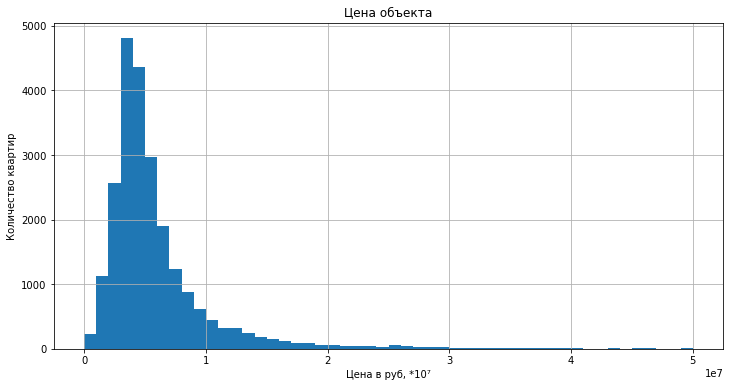

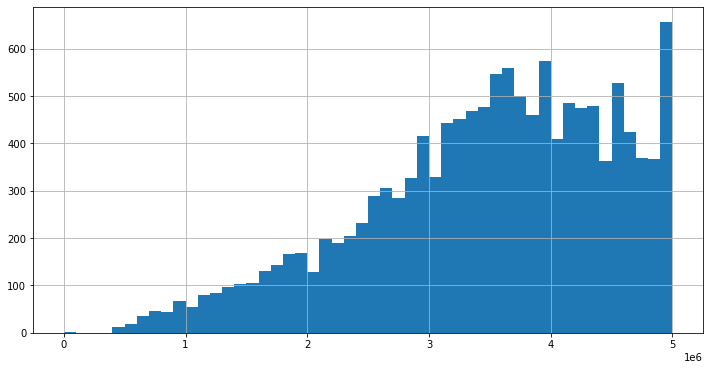

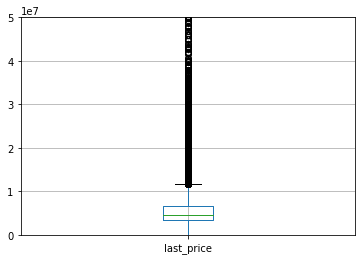

In [53]:
data['last_price'].hist(bins=100, figsize=(12, 6))
plt.title('Цена объекта')
plt.xlabel('Цена в руб, *10⁸')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].hist(bins=50, range=(0, 50000000), figsize=(12, 6))
plt.title('Цена объекта')
plt.xlabel('Цена в руб, *10⁷')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].hist(bins=50, range=(0, 5000000), figsize=(12, 6))
plt.show()
data.boxplot('last_price')
plt.ylim(0, 50000000)
plt.show()

**На графике мы видим, что значение на отметке 50 000 000 и 400 000 пропадает. Медиана находится на отметке 4,6 млн. и стремится вниз. Посчитаем количество квартир стоимостью более 50 000 000 и менее 400 000. (Такие цены тоже есть. Порывшись в интернете, нашел квартиры по 300К в деревнях Ленинградской области)**

In [54]:
data.query('last_price > 50000000')['last_price'].count()

119

In [55]:
data.query('last_price < 400000')['last_price'].count()

1

**Удалим аномальные значения (строки, где значения выше 50 000 000 и менее 400 000).**

In [56]:
data = data.query('400000 <= last_price <= 50000000')
# проверим количество строк
len(data)

23300

<font color="green" size="5">*Рассмотрим столбец "total_area". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [57]:
data.sort_values(by='total_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
4237,1,50000000,517.00,2017-10-14,7,2.70,4,332.00,3,False,False,False,22.00,0,Санкт-Петербург,22835.00,1847.00,2,477.00,2,540.00,NaN
9826,1,43185328,494.10,2017-05-12,1,2.85,12,17.60,3,False,False,False,9.00,0,Санкт-Петербург,28529.00,6832.00,1,592.00,0,504.00,5.00
660,3,49950000,483.90,2017-10-04,7,3.20,6,312.50,4,False,False,False,26.40,0,Санкт-Петербург,23079.00,945.00,3,461.00,3,22.00,391.00
6221,8,34000000,470.30,2018-01-14,4,2.70,3,248.70,3,False,False,False,40.00,0,Санкт-Петербург,43756.00,15459.00,1,852.00,3,122.00,179.00
20273,12,20000000,460.80,2019-03-20,6,3.10,3,279.60,1,False,False,False,55.50,0,Санкт-Петербург,43756.00,15459.00,1,852.00,3,122.00,21.00
3676,12,28789000,441.98,2019-01-23,4,2.70,6,63.65,6,False,False,False,35.05,0,Санкт-Петербург,20552.00,5181.00,0,460.00,0,504.00,NaN
22131,14,27000000,422.20,2018-10-18,5,2.70,13,91.78,11,False,False,False,15.10,0,Санкт-Петербург,46625.00,16554.00,0,460.00,0,504.00,NaN
14991,19,45000000,413.50,2018-09-20,7,2.70,20,74.20,18,False,False,False,13.90,0,Санкт-Петербург,18748.00,4341.00,0,460.00,0,504.00,182.00
5873,0,38000000,400.00,2019-03-15,7,3.60,3,145.00,1,False,False,False,20.00,0,Санкт-Петербург,24889.00,5457.00,1,271.00,0,504.00,NaN
8822,14,49968900,398.00,2017-07-12,9,3.00,2,160.10,1,False,False,False,41.00,0,Санкт-Петербург,17720.00,16722.00,3,471.00,2,440.00,471.00


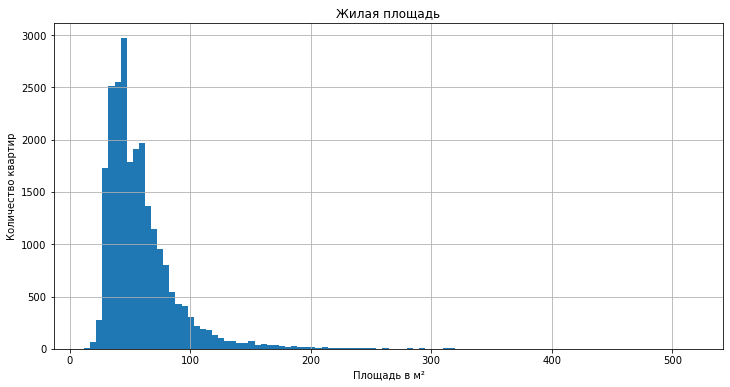

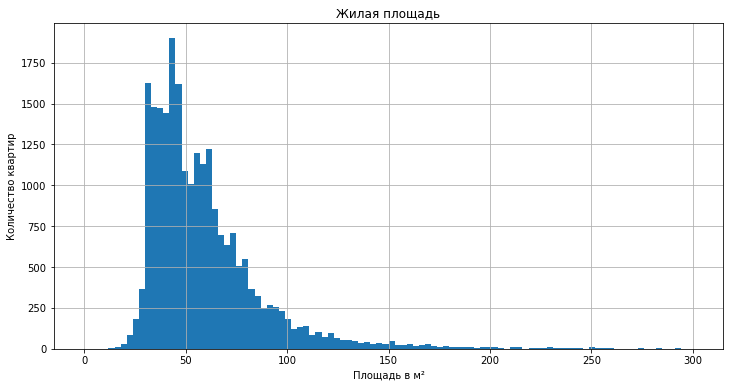

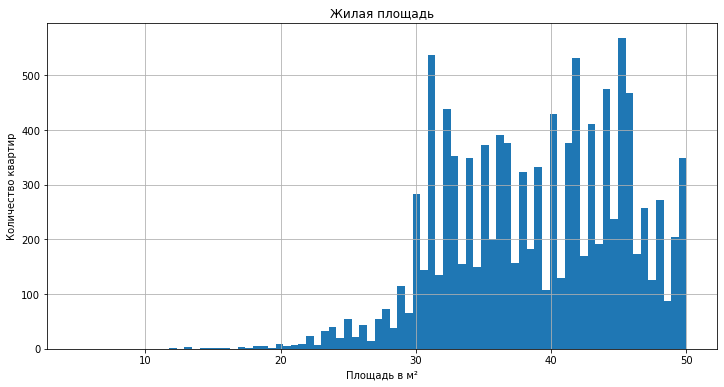

<AxesSubplot:>

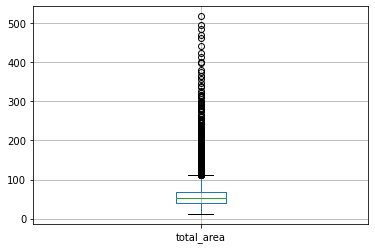

In [58]:
data['total_area'].hist(bins=100, figsize=(12, 6))
plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].hist(bins=100, range=(0, 300), figsize=(12,6))
plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].hist(bins=80, range=(5, 50), figsize=(12,6))
plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('total_area')

**На графике мы видим, что значение на отметке 250 и 12 пропадает. Медиана находится на отметке 52 и стремится вниз. Посчитаем количество квартир площадью более 250 и менее 14. (Несмотря на то, что сейчас продают микроквартиры и по 5 кв. м на человека, студия долна быть не менее 14 кв. м).**

In [59]:
data.query('total_area < 14')['total_area'].count()

5

In [60]:
data.query('total_area > 250')['total_area'].count()

50

**Удалим значения (строки, где значения выше 250 и менее 14).**

In [61]:
data = data.query('14 <= total_area <= 250')
# проверим количество строк
len(data)

23245

<font color="green" size="5">*Рассмотрим столбец "living_area". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [62]:
data.sort_values(by='living_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3043,11,33000000,240.00,2018-08-20,6,2.70,8,184.00,4,False,False,False,21.00,1,Санкт-Петербург,12634.00,8164.00,1,292.00,3,449.00,NaN
681,20,24900000,249.00,2015-08-13,7,2.70,5,180.00,4,False,False,False,20.00,1,Санкт-Петербург,24810.00,6108.00,0,460.00,0,504.00,781.00
8860,12,17000000,235.00,2018-07-14,9,3.00,6,179.20,3,False,False,False,14.30,0,Санкт-Петербург,24466.00,5034.00,1,346.00,0,504.00,90.00
18945,4,15800000,236.40,2015-02-19,8,2.70,6,176.60,6,False,False,False,22.60,0,Санкт-Петербург,20221.00,1802.00,3,571.00,3,441.00,921.00
8634,19,45900000,223.00,2017-09-20,5,3.10,10,175.00,10,False,False,False,18.00,0,Санкт-Петербург,26084.00,5807.00,3,411.00,1,478.00,365.00
7658,20,37000000,245.00,2018-10-17,6,3.50,5,174.30,4,False,False,False,16.00,1,Санкт-Петербург,26805.00,5519.00,2,608.00,1,69.00,NaN
6166,11,17000000,231.00,2017-09-10,6,2.70,6,171.00,6,False,False,False,30.00,0,Санкт-Петербург,25761.00,5671.00,2,375.00,1,479.00,159.00
7997,20,24900000,230.00,2018-11-15,7,3.50,5,167.00,4,False,False,False,18.00,1,Санкт-Петербург,23175.00,2717.00,0,460.00,1,848.00,NaN
7729,20,16000000,248.00,2017-07-25,7,3.32,6,166.70,2,False,False,False,25.30,0,Санкт-Петербург,20074.00,3147.00,2,575.00,3,56.00,9.00
8333,14,19700000,237.00,2018-03-14,6,2.70,5,165.50,4,False,False,False,42.00,0,Санкт-Петербург,22526.00,3791.00,0,460.00,1,658.00,335.00


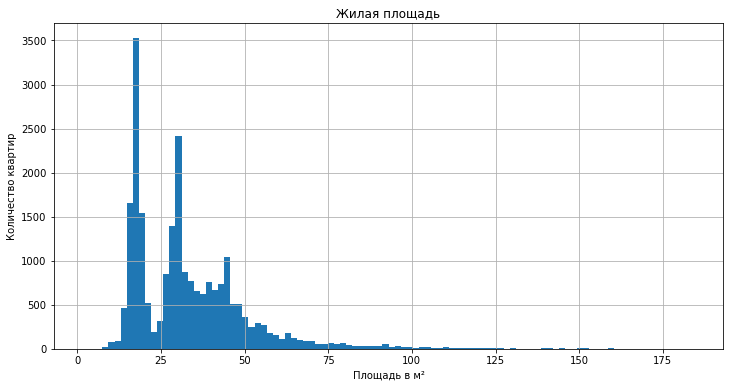

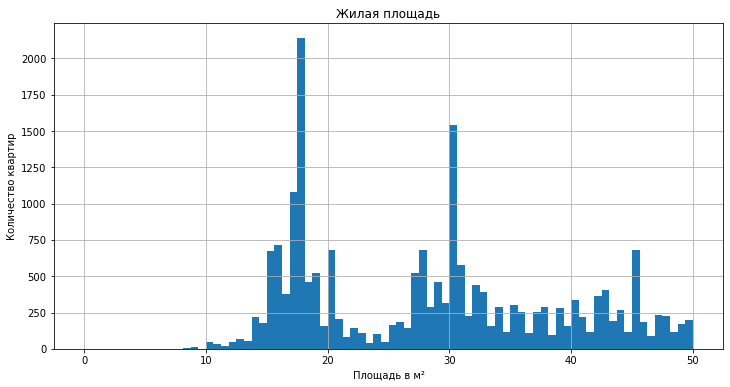

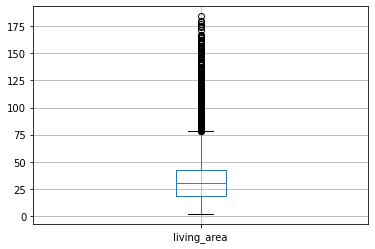

In [63]:
data['living_area'].hist(bins=100, figsize=(12, 6))
plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].hist(bins=80, range=(0, 50), figsize=(12, 6))
plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('living_area')
plt.show()

**На графике мы видим, что значение на отметке 175 и 10 пропадает. Посчитаем количество квартир жилой площадью более 175 и менее 10.**

In [64]:
data.query('living_area < 10')['living_area'].count()

24

In [65]:
data.query('living_area > 175')['living_area'].count()

4

**Удалим значения (строки, где значения выше 175 и менее 10).**

In [66]:
data = data.query('10 <= living_area <= 175')
# проверим количество строк
len(data)

23217

<font color="green" size="5">*Рассмотрим столбец "kitchen_area". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [67]:
data.sort_values(by='kitchen_area', ascending=False).head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
14644,17,47000000,150.00,2017-02-28,4,3.70,6,58.00,5,False,False,False,75.00,1,Санкт-Петербург,16085.00,7616.00,0,460.00,0,504.00,507.00
6193,19,24300000,230.00,2016-06-03,4,2.70,3,90.00,2,False,False,False,70.00,0,Санкт-Петербург,39422.00,15354.00,0,460.00,1,345.00,397.00
22980,19,24500000,155.40,2017-10-10,3,3.00,4,72.00,2,False,False,False,65.00,0,Санкт-Петербург,43758.00,15461.00,1,756.00,2,278.00,325.00
18447,17,21800000,187.00,2018-01-14,5,2.70,4,120.00,4,False,False,False,65.00,0,Санкт-Петербург,43758.00,15461.00,1,756.00,2,278.00,NaN
15780,9,12990000,119.60,2017-03-13,3,3.00,5,36.40,4,False,False,False,64.00,4,Пушкин,18616.00,30770.00,1,569.00,0,444.00,NaN
19499,10,8000000,118.00,2017-08-31,3,3.00,5,36.00,4,False,False,False,64.00,4,Пушкин,18616.00,30770.00,1,569.00,0,444.00,7.00
19130,11,40000000,153.00,2017-09-02,3,3.30,10,45.20,7,False,False,False,63.00,2,Санкт-Петербург,26763.00,NaN,0,460.00,1,504.00,455.00
14900,20,25900000,125.60,2018-08-14,2,4.00,4,42.70,4,False,False,False,62.50,2,Пушкин,13426.00,25580.00,0,399.50,0,444.00,194.00
3561,5,12300000,115.00,2017-08-09,3,2.70,20,45.00,16,False,False,False,60.00,1,Санкт-Петербург,33386.00,14234.00,0,460.00,0,504.00,63.00
8261,20,36000000,123.20,2018-01-14,1,3.00,14,31.20,7,False,False,False,58.40,1,Санкт-Петербург,28098.00,6800.00,2,84.00,3,234.00,61.00


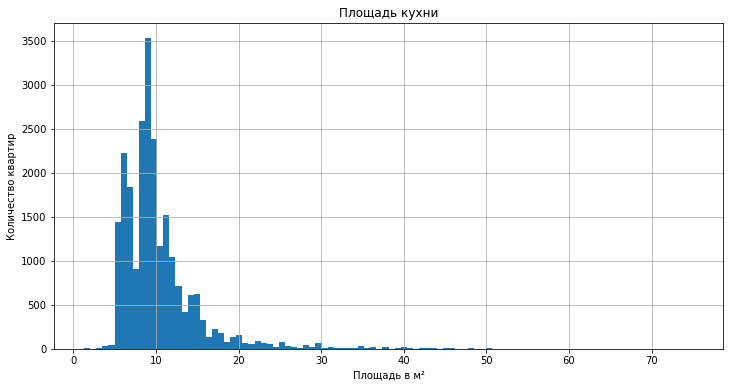

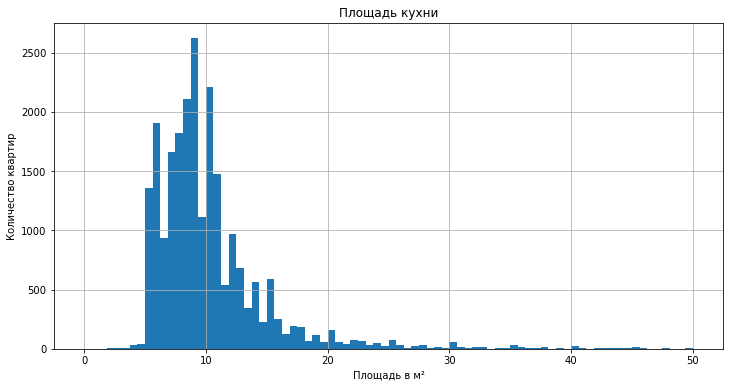

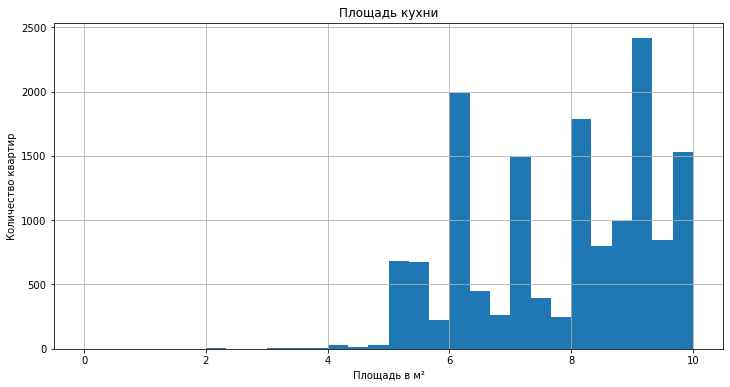

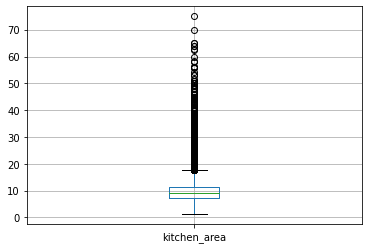

In [68]:
data['kitchen_area'].hist(bins=100, figsize=(12, 6))
plt.title('Площадь кухни')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].hist(bins=80, range=(0, 50), figsize=(12, 6))
plt.title('Площадь кухни')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].hist(bins=30, range=(0, 10), figsize=(12, 6))
plt.title('Площадь кухни')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('kitchen_area')
plt.show()

**На графике мы видим, что значение на отметке 50 и 2 пропадает. Посчитаем количество квартир с площадью кухни более 50 и менее 2 кв. м.**

In [69]:
data.query('kitchen_area > 50')['kitchen_area'].count()

23

In [70]:
data.query('kitchen_area < 2')['kitchen_area'].count()

1

**Удалим значения (строки, где значения выше 50 и менее 2).**

In [71]:
data = data.query('2 <= kitchen_area <= 50')
# проверим количество строк
len(data)

23193

<font color="green" size="5">*Рассмотрим столбец "airports_nearest". Посмотрим на отсортированную таблицу по убыванию значений. Построим гистограмму и диаграмму размаха.*</font>

In [72]:
data.sort_values('airports_nearest').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000,34.70,2018-09-23,1,2.70,9,19.80,3,False,False,False,6.00,2,Санкт-Петербург,0.00,22801.00,0,460.00,0,504.00,60.00
12899,8,4199000,56.00,2017-12-21,2,2.70,9,27.00,5,False,False,False,15.00,0,Санкт-Петербург,6450.00,17461.00,0,460.00,1,444.00,24.00
4017,7,2268000,35.00,2017-12-21,1,2.70,9,14.00,6,False,False,False,8.00,0,Санкт-Петербург,6450.00,17461.00,0,460.00,1,444.00,25.00
7778,9,2750000,29.00,2017-02-19,1,2.50,4,15.00,1,False,False,False,6.00,0,Санкт-Петербург,6914.00,21486.00,1,215.00,0,504.00,43.00
23150,3,6490000,62.50,2015-03-18,2,2.70,24,33.50,15,False,False,False,9.00,4,Санкт-Петербург,6949.00,13165.00,1,711.00,0,504.00,917.00


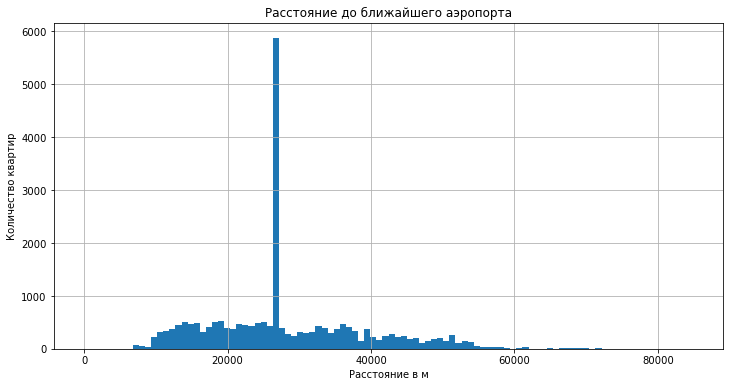

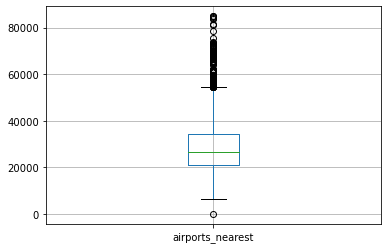

In [73]:
data['airports_nearest'].hist(bins=100, figsize=(12, 6))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()
data.boxplot('airports_nearest')
plt.show()

**В данных только 1 квартира выглядит как аномалия. Удалим её**

In [74]:
data.query('airports_nearest < 5000')['kitchen_area'].count()

1

In [75]:
data = data.query('airports_nearest > 5000')
# проверим количество строк
len(data)

23192

### Результат проделанной работы:    
1. Исправим названия столбцов     
2. Обработаны пропуски:     
    2.1 Удалены строки с пропусками менее 1% в столбцах 'locality_name', 'floors_total'.    
    2.2. Заполнены пропуски в "is_apartment" значением "False".    
    2.3. Пропуски в столбцах "days_exposition" и 'balcony' заполним нулями.    
    2.4. Пропуски в столбцах 'ceiling_height', 'ponds_around_3000', 'parks_around_3000', 'airports_nearest', 'city_centers_nearest', 'parks_nearest', 'ponds_nearest' заполнены медианным значением относительно населённого пункта. Оставшиеся пропуски заменены медианой всего столбца.    
    2.5. Пропуски в столбцах "living_area" и "kitchen_area" заменены на медиану, относительно количества комнат в квартире, оставшиеся пропуски заменены медианой всего столбца.    
3. Изменены типы данных:    
    + "floors_total" - с float на int 
    + "last_price" - с float на int 
    + "balcony" - с float на int 
    + "days_exposition" - с float на int 
    + "parks_around_3000" - с float на int 
    + "ponds_around_3000" - с float на int 
    + "first_day_exposition" - с object на datetime   
4. Обработаны неявные дубликаты в названии населённых пунктов. Количество уникальных названий было сокращено с 364 до 318    
5. Обработаны аномальные значения и выбросы

<font color="green" size="4">**Процент удалённых данных во время обработки - 2,14%**</font>

## Посчитайте и добавьте в таблицу новые столбцы

### Добавим столбец - цена одного квадратного метра.

In [76]:
data['price_sqm'] = data['last_price'] / data['total_area']

### Добавим столбец - день недели публикации объявления.

In [77]:
data['day_posted'] = data['first_day_exposition'].dt.weekday

### Добавим столбец - месяц публикации объявления.

In [78]:
data['month_posted'] = data['first_day_exposition'].dt.month

### Добавим столбец - год публикации объявления.

In [79]:
data['year_posted'] = data['first_day_exposition'].dt.year

### Добавим столбец - тип этажа квартиры

In [80]:
# напишем функцию для категоризации
def floor_type_def(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

# добавим столбец - тип этажа
data['floor_type'] = data.apply(floor_type_def, axis=1)

### Добавим столбец - расстояние до центра города в километрах.

In [81]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

In [82]:
# проверим новые столбцы
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_posted,month_posted,year_posted,floor_type,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.00,16028.00,1,482.00,2,755.00,NaN,120370.37,3,3,2019,другой,16.03
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.00,18603.00,0,460.00,0,584.50,81.00,82920.79,1,12,2018,первый,18.60
2,10,5196000,56.00,2015-08-20,2,2.70,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.00,13933.00,1,90.00,2,574.00,558.00,92785.71,3,8,2015,другой,13.93
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.00,8098.00,2,112.00,1,48.00,121.00,100000.00,1,6,2018,другой,8.10
5,10,2890000,30.40,2018-09-10,1,2.60,12,14.40,5,False,False,False,9.10,0,поселок Янино-1,26763.00,NaN,0,460.00,1,504.00,55.00,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.00,19143.00,0,733.00,0,593.00,155.00,99195.71,3,11,2017,другой,19.14
7,5,7915000,71.60,2019-04-18,2,2.70,24,30.50,22,False,False,False,18.90,2,Санкт-Петербург,23982.00,11634.00,0,460.00,0,504.00,NaN,110544.69,3,4,2019,другой,11.63
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,False,False,8.81,0,поселок Мурино,26763.00,NaN,0,460.00,1,504.00,189.00,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.00,15008.00,0,460.00,0,504.00,289.00,88524.59,6,2,2017,другой,15.01
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,False,False,8.50,0,Санкт-Петербург,38357.00,13878.00,1,310.00,2,553.00,137.00,127525.25,3,11,2017,другой,13.88


**Вывод:    
Произвели расчеты и добавили в таблицу шесть новых столбцов**

## Проведите исследовательский анализ данных

### Изучим параметры объектов недвижимости:

In [83]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_sqm,day_posted,month_posted,year_posted,city_centers_nearest_km
count,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,23192.00,17735.00,23192.00,23192.00,23192.00,23192.00,20088.00,23192.00,23192.00,23192.00,23192.00,17735.00
mean,9.86,5908556.60,58.44,2.04,2.70,10.72,33.38,5.89,10.23,0.59,28344.07,14301.03,0.46,472.18,0.82,510.08,179.67,97434.78,2.57,6.40,2017.37,14.30
std,5.66,4731940.57,27.64,1.01,0.20,6.59,18.02,4.88,4.81,0.96,11130.64,8594.64,0.74,202.37,0.82,174.22,218.86,39179.63,1.79,3.49,1.04,8.59
min,0.00,430000.00,14.00,0.00,2.50,1.00,10.00,1.00,2.00,0.00,6450.00,181.00,0.00,1.00,0.00,13.00,1.00,7962.96,0.00,1.00,2014.00,0.18
25%,6.00,3400000.00,40.00,1.00,2.55,5.00,18.30,2.00,7.30,0.00,21039.50,9459.00,0.00,460.00,0.00,504.00,45.00,76457.21,1.00,3.00,2017.00,9.46
50%,9.00,4600000.00,51.90,2.00,2.70,9.00,30.10,4.00,9.00,0.00,26763.00,13164.00,0.00,460.00,1.00,504.00,95.00,94754.31,3.00,6.00,2017.00,13.16
75%,14.00,6700000.00,68.90,3.00,2.70,16.00,42.18,8.00,11.32,1.00,34491.00,16333.00,1.00,460.00,1.00,504.00,229.00,113636.36,4.00,10.00,2018.00,16.33
max,50.00,50000000.00,250.00,9.00,4.00,36.00,175.00,33.00,50.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00,848484.85,6.00,12.00,2019.00,65.97


#### Общая площадь

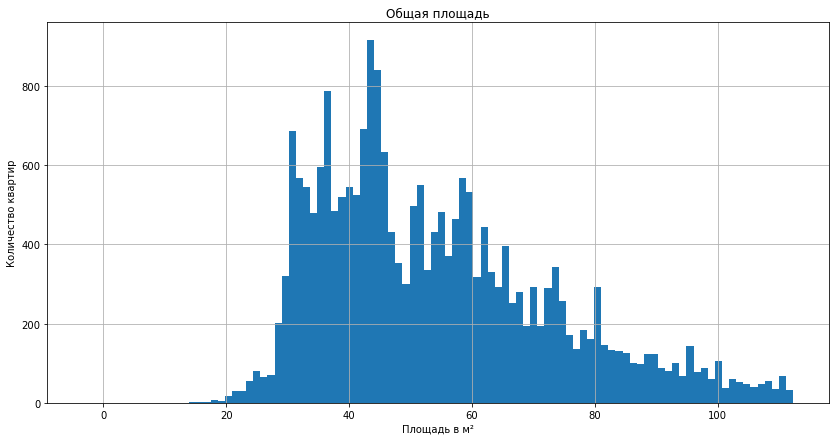

In [84]:
# пропишем функцию для построения графиков
def study_hist(col, buckets):
    q1 = data[col].quantile(.25)  # первый квартиль Q1
    q3 = data[col].quantile(.75)  # третий квартиль Q3
    iqr = q3 - q1                 # межквартильный размах IQR
    return data[col].hist(bins=buckets, figsize=(14, 7), range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr)))

study_hist('total_area', 100)
plt.title('Общая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()

In [85]:
round(data[(data['total_area'] >= 25) & (data['total_area'] <= 50)]).groupby('total_area')['total_area'].count()

total_area
25.00     54
26.00     63
27.00     62
28.00    104
29.00    162
30.00    368
31.00    622
32.00    572
33.00    435
34.00    498
35.00    481
36.00    590
37.00    447
38.00    494
39.00    423
40.00    543
41.00    425
42.00    715
43.00    497
44.00    697
45.00    714
46.00    619
47.00    345
48.00    361
49.00    265
50.00    346
Name: total_area, dtype: int64

**Общая площадь напоминает распределение Пуассона с длинным "хвостом" в положителтную сторону. Основная масса квартир находится в диапазоне от 30 до 46 м², есть падения от 46 до 50 м². Также имеется подъём 50 - 65 м² Медианное значение - 52 м². Далее график распределяется - чем больше площадь, тем меньше квартир, с небольшими перепадами.**

#### Жилая площадь

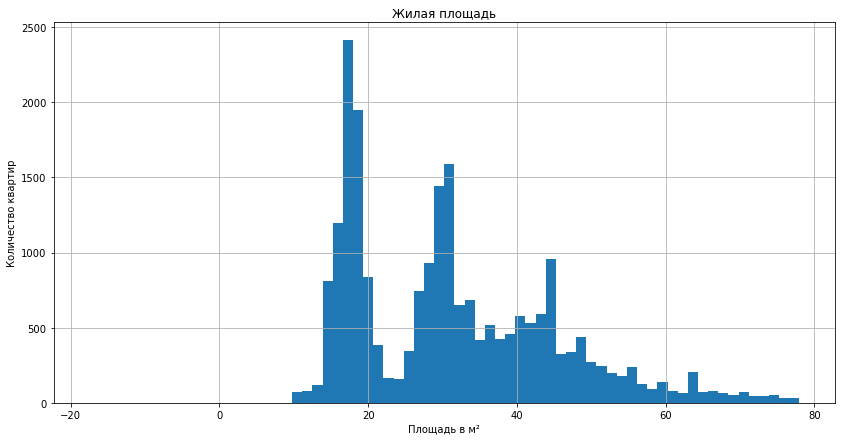

In [86]:
study_hist('living_area', 70)

plt.title('Жилая площадь')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()

In [87]:
round(data[(data['living_area'] >= 10) & (data['living_area'] <= 46)]).groupby('living_area')['living_area'].count()

living_area
10.00      40
11.00      46
12.00      68
13.00      79
14.00     330
15.00     640
16.00    1074
17.00    1241
18.00    2444
19.00     716
20.00     788
21.00     246
22.00     208
23.00     113
24.00     139
25.00     169
26.00     262
27.00     610
28.00     879
29.00     585
30.00    1769
31.00     702
32.00     635
33.00     420
34.00     414
35.00     344
36.00     348
37.00     309
38.00     352
39.00     342
40.00     456
41.00     274
42.00     469
43.00     467
44.00     404
45.00     709
46.00     207
Name: living_area, dtype: int64

**Жилая площадь имеет несколько пиовых значений 18, 30 и 45 м², но скорее всего это из-за заполнения пропусков медианными значениями. Наибольшее количество квартир с жилой площадью 16 - 18 м². Далее идет падение 22 - 25 м². Затем подъём 27 - 32 м² Потом график распределяется - чем больше площадь, тем меньше квартир, с небольшими перепадами. Медианное значение - 30 м²**

#### Площадь кухни

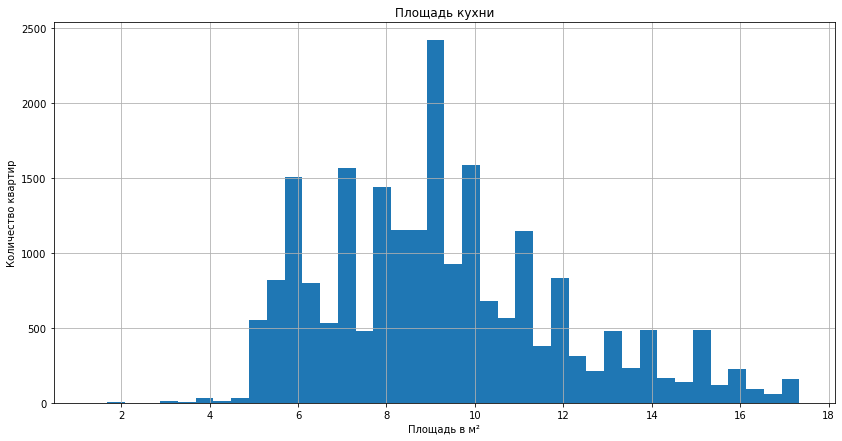

In [88]:
study_hist('kitchen_area', 40)

plt.title('Площадь кухни')
plt.xlabel('Площадь в м²')
plt.ylabel('Количество квартир')
plt.show()

In [89]:
round(data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 15)]).groupby('kitchen_area')['kitchen_area'].count()

kitchen_area
5.00      821
6.00     3105
7.00     1933
8.00     2970
9.00     3700
10.00    3047
11.00    1818
12.00    1422
13.00     753
14.00     814
15.00     491
Name: kitchen_area, dtype: int64

**Площадь напоминает распределение Пуассона с длинным "хвостом" в положителтную сторону. Основная масса квартир находится в диапазоне 6 - 10 м². Медианное значение - 9 м². Далее график распределяется - чем больше площадь, тем меньше квартир.**

#### Цена объекта

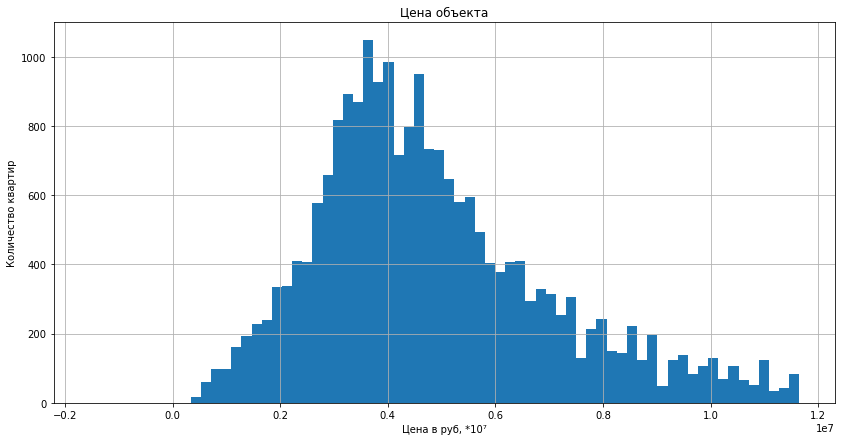

In [144]:
study_hist('last_price', 70)

plt.title('Цена объекта')
plt.xlabel('Цена в руб, *10⁷')
plt.ylabel('Количество квартир')
plt.show()

In [91]:
round(data[(data['last_price'] >= 4000000) & (data['last_price'] <= 5000000)], -5).groupby('last_price')['last_price'].count()

last_price
4000000    350
4100000    324
4200000    620
4300000    353
4400000    483
4500000    436
4600000    525
4700000    276
4800000    463
4900000    268
5000000    446
Name: last_price, dtype: int64

**График напоминает нормальное распределение с "хвостом" в положительную сторону. Пик на графике - цена 4,2 млн. руб., этих квартир больше ввсего. Медианное значение - 4,6 млн. руб.**

#### Количество комнат

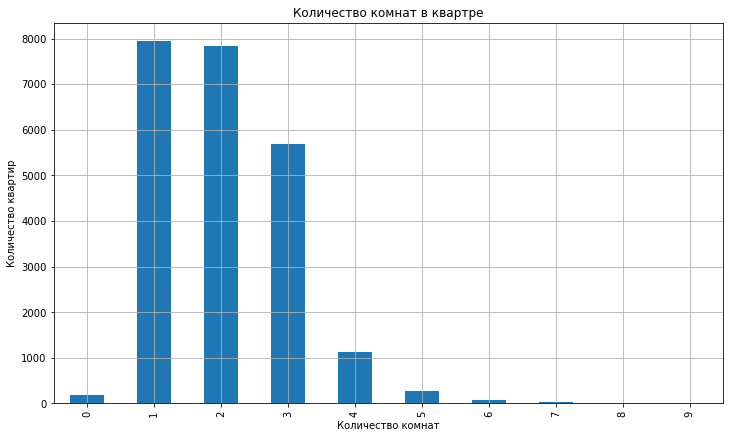

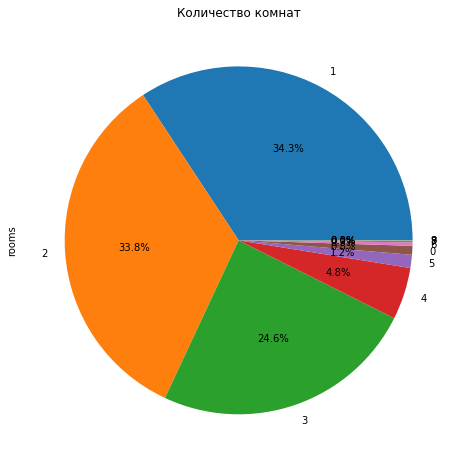

In [142]:
data.groupby('rooms')['rooms'].count().plot(kind='bar',
                                            grid=True,
                                            figsize=(12, 7),
                                            xlabel='Количество комнат',
                                            ylabel='Количество квартир',
                                            title='Количество комнат в квартре')
plt.show()
data['rooms'].value_counts().plot(kind='pie', autopct='%0.1f%%', figsize=(8, 8), title='Количество комнат')
plt.show()

In [93]:
data.groupby('rooms')['rooms'].count()

rooms
0     190
1    7946
2    7835
3    5698
4    1123
5     283
6      75
7      34
8       6
9       2
Name: rooms, dtype: int64

**Основная масса квартир одно- и двухкомнатные. Больше всего однокомнатных квартир - почти 8000, чуть меньше двухкомнатных.Трехкомнатных около 5700. Далее идёт спад.**

#### Высота потолков

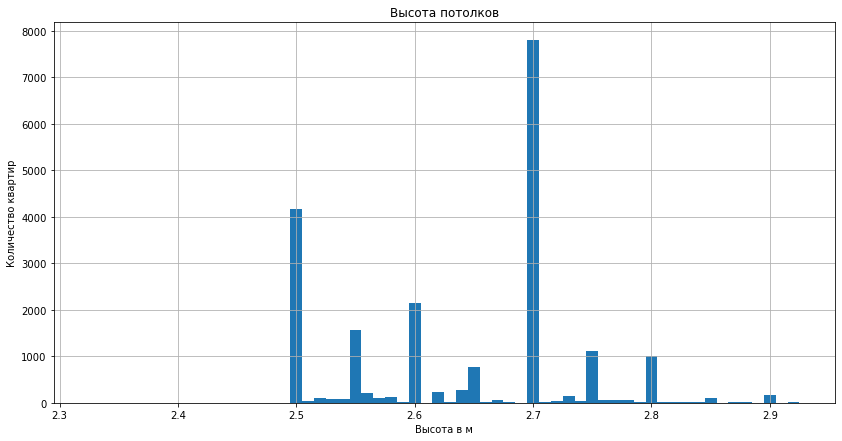

In [94]:
study_hist('ceiling_height', 60)

plt.title('Высота потолков')
plt.xlabel('Высота в м')
plt.ylabel('Количество квартир')
plt.show()

In [95]:
round(data[(data['ceiling_height'] >= 2.5) & (data['ceiling_height'] <= 4)], 1) \
.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
2.50    4468
2.60    5445
2.70    8102
2.80    2452
2.90     209
3.00    1206
3.10     277
3.20     393
3.30     169
3.40     123
3.50     144
3.60      67
3.70      36
3.80      33
3.90      27
4.00      41
Name: ceiling_height, dtype: int64

**Основой пик - квартиры  с высотой 2,7 м. Скорее всего такой скачок произошёл из-за заполнения медианой, относительно локации. Пик - это, видимо, пропущенные значения для Санкт-петербурга. Это значение также является медианой. В общем, - основная масса квартир с высотой потолков 2,5 - 2,7 м.**

In [96]:
sp = data.query('locality_name == "Санкт-Петербург"')
round(sp[(sp['ceiling_height'] >= 2.5) & (sp['ceiling_height'] <= 2.8)], 2) \
.groupby('ceiling_height')['ceiling_height'].count()

ceiling_height
2.50    2099
2.51      27
2.52      53
2.53      48
2.54      63
2.55     620
2.56      91
2.57      74
2.58      35
2.59       8
2.60     990
2.61       4
2.62       9
2.63       7
2.64      67
2.65     501
2.66      16
2.67      34
2.68      22
2.69       1
2.70    6496
2.71      10
2.72      25
2.73      28
2.74      19
2.75     592
2.76      39
2.77      53
2.78      46
2.79       8
2.80     759
Name: ceiling_height, dtype: int64

**Для Санкт-петербурга основные пики - 2,5 и 2,7 м. Интересная особенность: больше всего значений кратных 0,05, видимо, люди любят округлять цифры, минимум до 5.**

#### Этаж квартиры

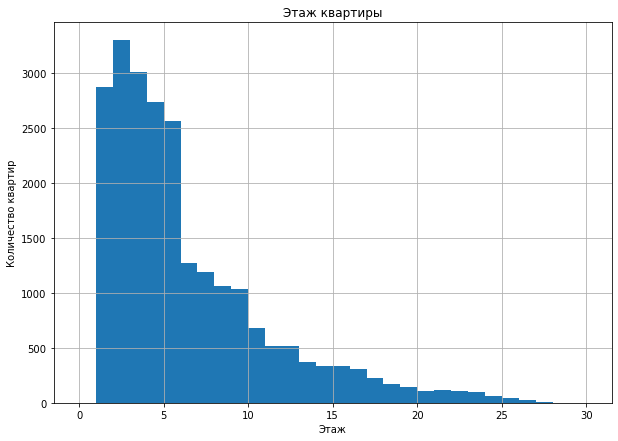

In [97]:
data['floor'].hist(bins=30, figsize=(10, 7), range=(0, 30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

In [98]:
round(data[(data['floor'] >= 0) & (data['floor'] <= 20)]).groupby('floor')['floor'].count()

floor
1     2872
2     3294
3     3010
4     2732
5     2559
6     1268
7     1185
8     1061
9     1035
10     681
11     512
12     514
13     374
14     331
15     336
16     311
17     223
18     172
19     144
20     108
Name: floor, dtype: int64

**Больше всего продаётся квартир с 1 - 9 этажи. Исходя из цифр можно сделать предположение, что в Ленинградской области больше всего пятиэтажных зданий, затем девятиэтажки - примерно, в 1,5 раза меньше.**

#### Тип этажа квартиры

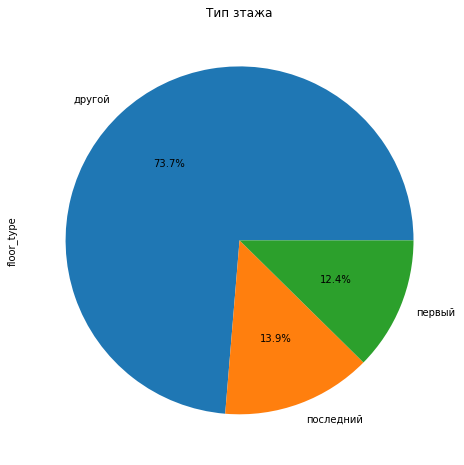

In [99]:
data['floor_type'].value_counts().plot(kind='pie', autopct='%0.1f%%', figsize=(8, 8), title='Тип зтажа')
plt.show()

**Вполне логичные цифры. Больше всего продаётся квартир с этажностью от 2-ого до предпоследнего. Исходя из прошлого вывода - это 60% в пятиэтажках + 77,(7)% в девятиэтажках + этажи выше 9 - ого.**

#### Общее количество этажей в доме

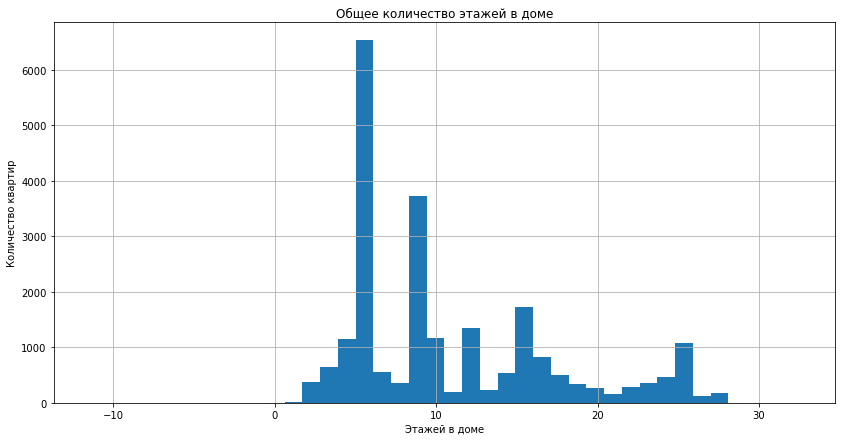

In [100]:
study_hist('floors_total', 40)

plt.title('Общее количество этажей в доме')
plt.xlabel('Этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

In [101]:
round(data[(data['floors_total'] >= 0) & (data['floors_total'] <= 30)]).groupby('floors_total')['floors_total'].count()

floors_total
1       23
2      373
3      645
4     1156
5     5673
6      861
7      562
8      360
9     3728
10    1169
11     201
12    1348
13     226
14     545
15     363
16    1367
17     827
18     502
19     338
20     267
21     158
22     283
23     348
24     461
25    1071
26     123
27     163
28      21
29       1
Name: floors_total, dtype: int64

**Наши прадыдущие выводы оказались верны - больше всего пятиэтажных зданий - 5673, затем девятиэтажки - 3728. Также есть пики 12 и 17 этажей.**

#### Расстояние до центра города в метрах

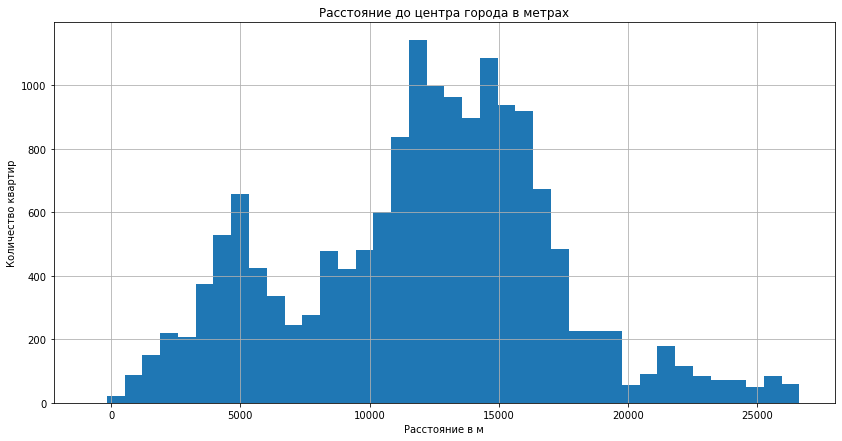

In [102]:
study_hist('city_centers_nearest', 40)

plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()

In [103]:
round(data[(data['city_centers_nearest'] >= 0) & (data['city_centers_nearest'] <= 20000)], -3) \
.groupby('city_centers_nearest')['city_centers_nearest'].count()

city_centers_nearest
0.00          20
1000.00      171
2000.00      280
3000.00      335
4000.00      661
5000.00      865
6000.00      578
7000.00      393
8000.00      580
9000.00      586
10000.00     713
11000.00    1160
12000.00    1590
13000.00    1440
14000.00    1267
15000.00    1547
16000.00    1258
17000.00     893
18000.00     378
19000.00     357
20000.00      75
Name: city_centers_nearest, dtype: int64

**Самое большое значение 12000 км. 13164 км является медианой. Основная масса квартир находится в диапазоне 11000 - 17000 м.**

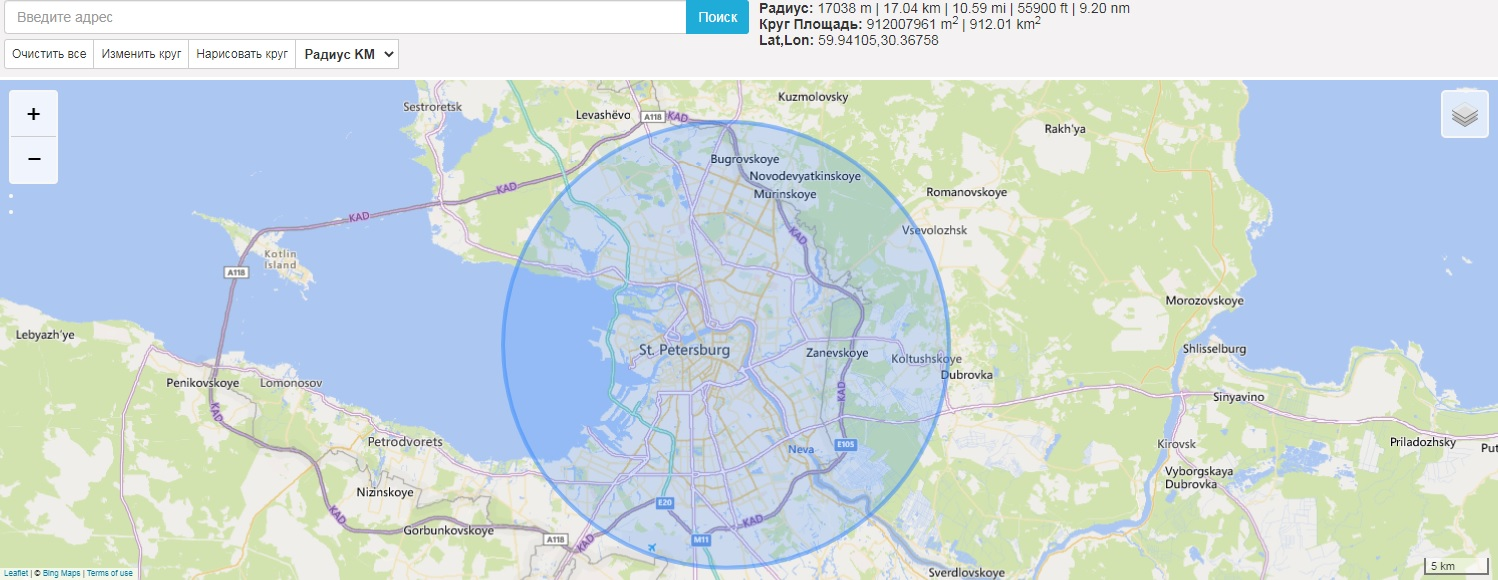

#### Расстояние до ближайшего аэропорта

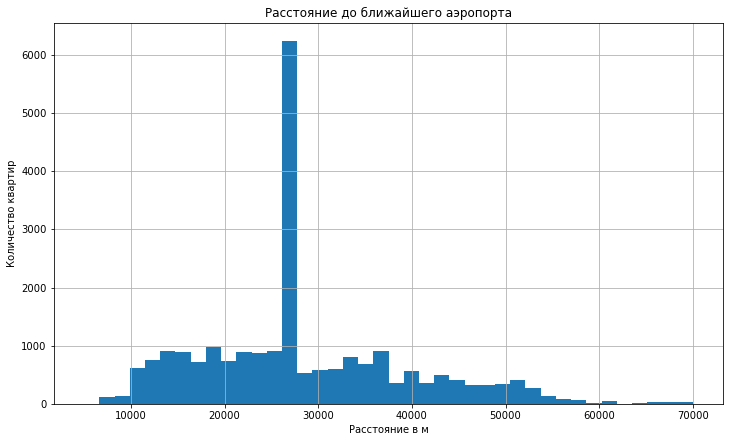

In [104]:
data['airports_nearest'].hist(bins=40, figsize=(12, 7), range=(5000, 70000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()

In [105]:
round(data[(data['airports_nearest'] >= 9000) & (data['airports_nearest'] <= 55000)], -3) \
.groupby('airports_nearest')['airports_nearest'].count()

airports_nearest
9000.00       44
10000.00     282
11000.00     416
12000.00     409
13000.00     540
14000.00     590
15000.00     581
16000.00     484
17000.00     403
18000.00     568
19000.00     611
20000.00     480
21000.00     454
22000.00     575
23000.00     466
24000.00     599
25000.00     593
26000.00     492
27000.00    5945
28000.00     407
29000.00     283
30000.00     376
31000.00     346
32000.00     373
33000.00     493
34000.00     467
35000.00     382
36000.00     538
37000.00     570
38000.00     216
39000.00     351
40000.00     296
41000.00     189
42000.00     284
43000.00     326
44000.00     253
45000.00     254
46000.00     218
47000.00     170
48000.00     176
49000.00     205
50000.00     238
51000.00     283
52000.00     170
53000.00     168
54000.00     160
55000.00      18
Name: airports_nearest, dtype: int64

**Самое большое значение 27000 м, это заполненые нами пропущенные значения. Остальные значения рапределены, примерно, равномерно в диапазоне 11000 - 37000 м, с небольшими перепадами, далее идёт спад.**

#### Расстояние до ближайшего парка

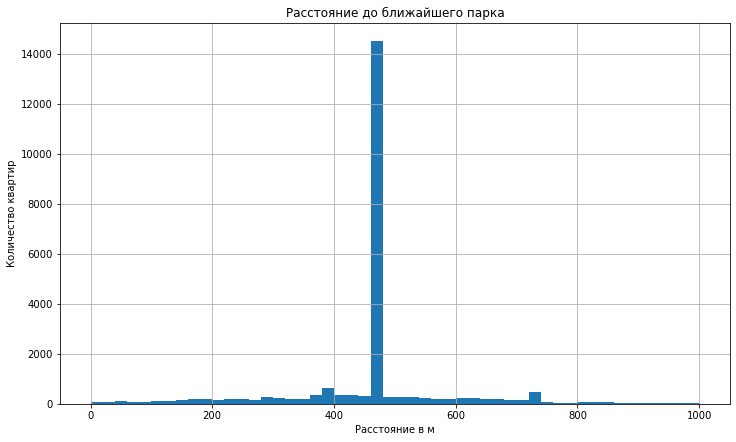

In [106]:
data['parks_nearest'].hist(bins=50, figsize=(12, 7), range=(0, 1000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние в м')
plt.ylabel('Количество квартир')
plt.show()

In [107]:
round(data[(data['parks_nearest'] >= 0) & (data['parks_nearest'] <= 800)], -2) \
.groupby('parks_nearest')['parks_nearest'].count()

parks_nearest
0.00        194
100.00      513
200.00      912
300.00     1036
400.00     2004
500.00    15563
600.00     1099
700.00     1029
800.00      140
Name: parks_nearest, dtype: int64

**Ситуация похожая. Самое большое значение 500 м, это заполненые нами пропущенные значения. 460 м является медианой. Остальные значения рапределены, примерно, равномерно в диапазоне 100 - 700 м, с небольшими перепадами, далее идёт спад. Это говорит о том, что в городе высока плотность парковых зон.**

#### День и месяц публикации объявления

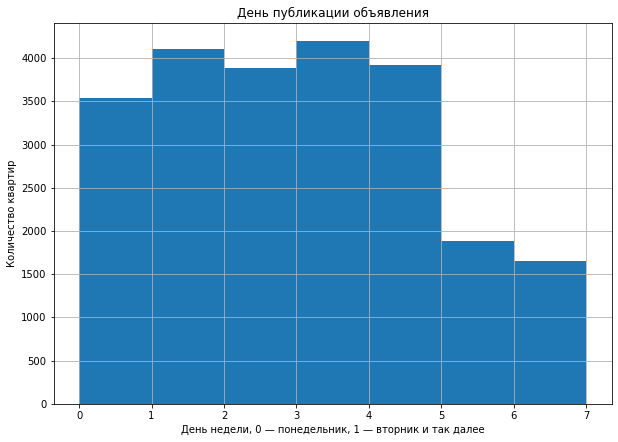

In [108]:
data['day_posted'].hist(bins=7, figsize=(10, 7), range=(0, 7))
plt.title('День публикации объявления')
plt.xlabel('День недели, 0 — понедельник, 1 — вторник и так далее')
plt.ylabel('Количество квартир')
plt.show()

**Больше всего объявлений разместили в будние дни, в выходные люди отдыхают))**

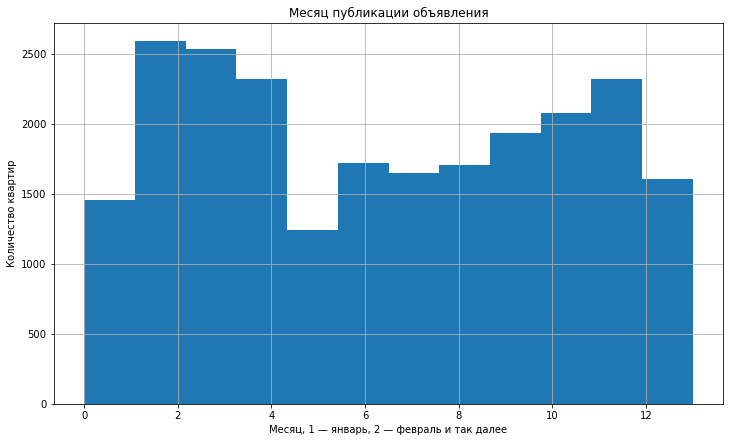

In [109]:
data['month_posted'].hist(bins=12, figsize=(12, 7), range=(0, 13))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц, 1 — январь, 2 — февраль и так далее')
plt.ylabel('Количество квартир')
plt.show()

In [110]:
data.groupby('month_posted')['month_posted'].count()

month_posted
1     1460
2     2593
3     2536
4     2326
5     1242
6     1724
7     1651
8     1712
9     1938
10    2078
11    2326
12    1606
Name: month_posted, dtype: int64

**Больше всего объявлений размещено в интервале февраль - апрель, далее идёт спад. Подъём начинается в сентябре и заканчивается в ноябре. Просадки в значениях наблюдаются в мае, январе и декабре. В мае люди готовятся к дачному сезону. В декабре , видимо, готовятся к Новому году, ищут подарки для близких(им не до объявлений). В январе довольно много праздников, возможно люди уезжают отдыхать. А невысокие показатели летних месяцев - люди проводят время на дачах, в отпуске.**

**Вывод:**    
*Проанализировали параметры объектов недвижимости. Среднестатистической является квартира:*      
+ с площадью 45 м²     
+ жилой площадью 18 м²    
+ площадью кухни 9 м²    
+ стоимостью 4,2 млн. р    
+ однокомнатная    
+ с высотой потолков 2,7 м    
+ на втором этаже    
+ в пятиэтажном доме    
+ с расстоянием до центра в 13 км    
+ с расстоянием до аэропорта 27 км    
+ с расстоянием до парка 500 м     
+ которое подали в четверг в феврале    
)))

###  Исследование  скорости продаж квартир.

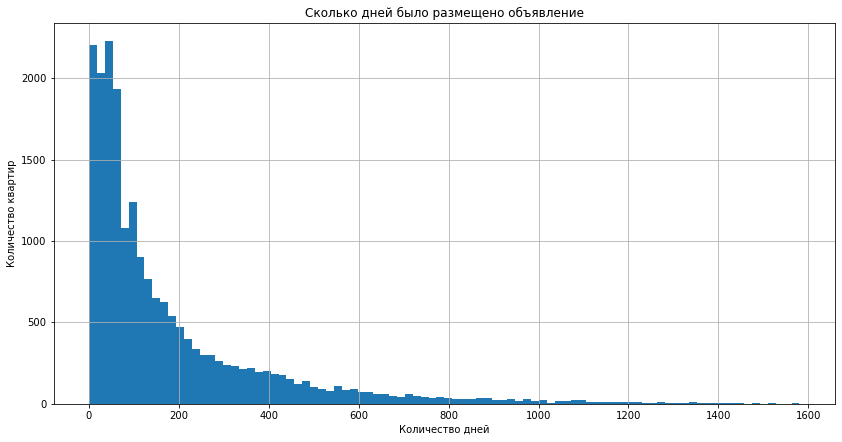

In [111]:
data['days_exposition'].hist(bins=90, figsize=(14, 7))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

**Мы видим очень длинный "хвост" значений. Ограничим гистограмму.**

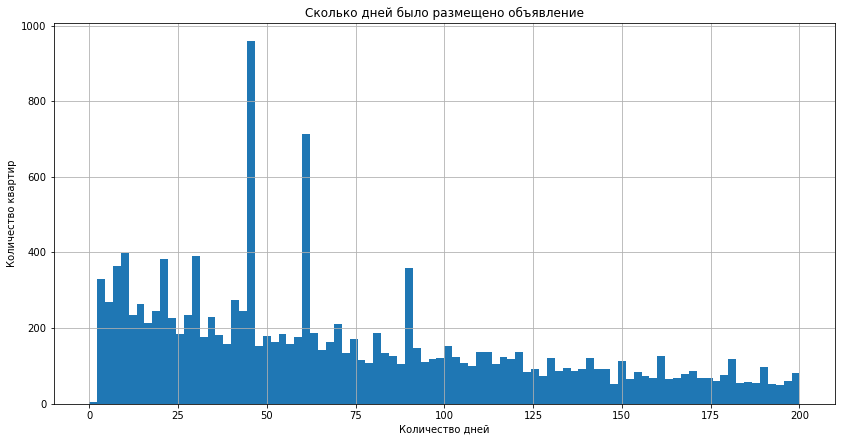

In [112]:
data['days_exposition'].hist(bins=90, figsize=(14, 7), range=(0, 200))
plt.title('Сколько дней было размещено объявление')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [113]:
data[(data['days_exposition'] >= 40) & (data['days_exposition'] <= 62)] \
.groupby('days_exposition')['days_exposition'].count()

days_exposition
40.00     89
41.00     75
42.00    111
43.00    107
44.00    137
45.00    870
46.00     88
47.00     77
48.00     77
49.00     67
50.00     60
51.00     51
52.00     84
53.00     80
54.00    110
55.00     74
56.00     85
57.00     74
58.00     71
59.00    106
60.00    535
61.00    107
62.00     70
Name: days_exposition, dtype: int64

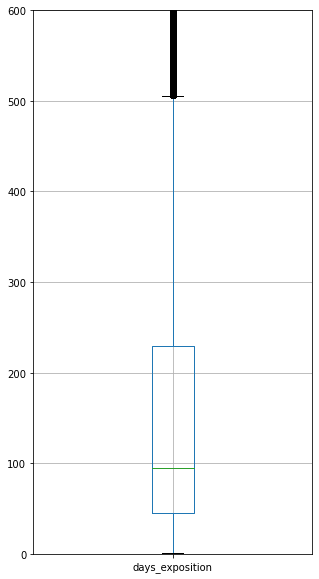

In [114]:
data.boxplot('days_exposition', figsize=(5, 10))
plt.ylim(0, 600)
plt.show()

In [115]:
data.query('days_exposition != 0')['days_exposition'].describe()

count   20088.00
mean      179.67
std       218.86
min         1.00
25%        45.00
50%        95.00
75%       229.00
max      1580.00
Name: days_exposition, dtype: float64

**Как мы видим из данных, у нас есть два пика значений 45 и 60 дней. Скорее всего, эти цифры означают окончание публикации. То есть, если не продлеваешь объявление оно уходит в архив. Видимо сделка состоялась, а объявление не сняли, вот они "пачкой" и самоликвидировались))) Медианное значение - 95 дней, среднее почти в два раза больше - 180 дней (причина этому - длинный "хвост"). Учитывая 1 и 3 квантиль, а также первый срок окончания объявлений, можно предположить, что быстрые продажи менее 45 дней (вероятно, даже месяц). Долгими продажами можно считать квартиры, объявления о которых "висит" более 230 дней.**

### Зависимость цены от других показателей.

**Рассмотрим зависимости цены от:**
1. общей площади    
2. жилой площади    
3. площади кухни         
4. количества комнат
5. этажа, на котором расположена квартира (первый, последний, другой)
6. даты размещения (день недели, месяц, год).

#### Общая площадь

**Построим графики корреляции двумя способами, выведем зависимость медианной цены от общей площади и посчитаем коэффициент корреляции.**

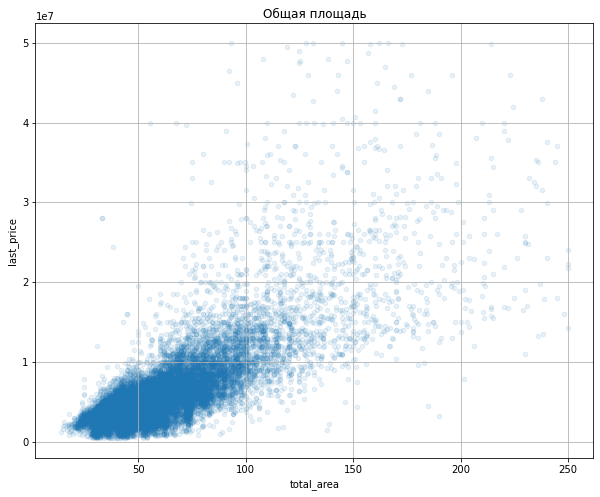

In [116]:
data.plot(x='total_area', 
          y='last_price', 
          kind='scatter', 
          grid=True, 
          figsize=(10, 8), 
          alpha=0.1, 
          title='Общая площадь')
plt.show()

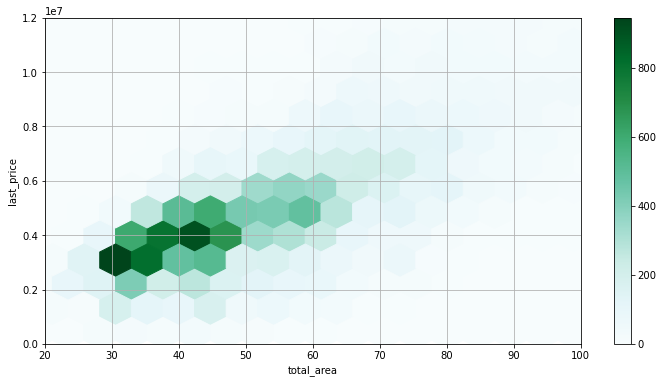

In [117]:
data.plot(x='total_area',
          y='last_price',
          kind='hexbin',
          gridsize=50,
          figsize=(12, 6),
          sharex=False,
          grid=True,
          xlim=(20, 100),
          ylim=(0, 12000000))
plt.show()

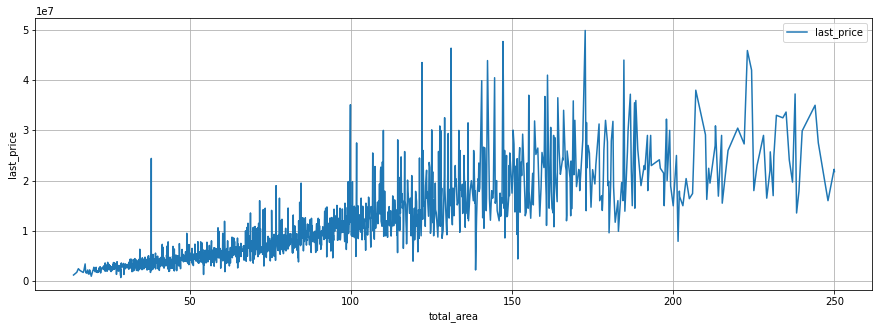

In [118]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(y='last_price',
                                                                                 grid=True,
                                                                                 figsize=(15, 5),
                                                                                 ylabel='last_price')
plt.show()

In [119]:
round(data['total_area'].corr(data['last_price']), 2)

0.77

**Мы видим, что присутствует положительная корреляция. Коэффициент равен 0,77. Минимальный разброс цен мы видим для квартир до 100 м², далее разброс увеличивается, после 120 начинается хаос.**

#### Жилая площадь.

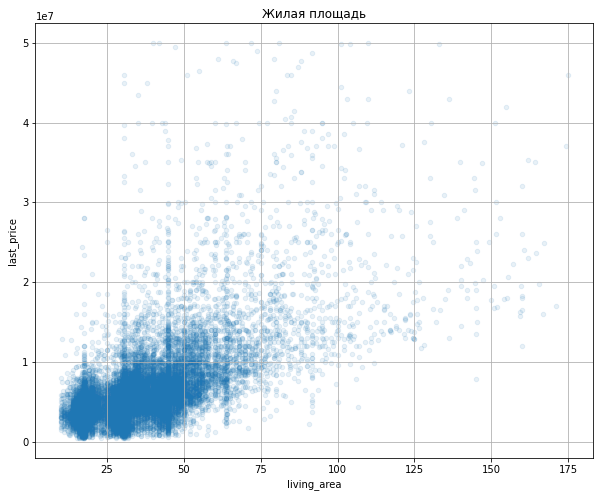

In [120]:
data.plot(x='living_area',
          y='last_price',
          kind='scatter',
          grid=True,
          figsize=(10, 8),
          alpha=0.1,
          title='Жилая площадь')
plt.show()

In [121]:
round(data['living_area'].corr(data['last_price']), 2)

0.65

**Мы видим, что присутствует положительная корреляция, хотя и меньше. Коэффициент равен 0,65. Минимальный разброс цен мы видим для квартир до 40 м², далее разброс увеличивается, после 65 м² начинается хаос.**

#### Площадь кухни.

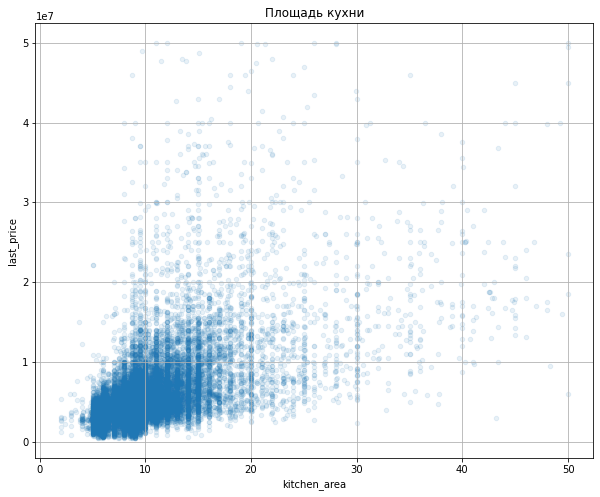

In [122]:
data.plot(x='kitchen_area',
          y='last_price',
          kind='scatter',
          grid=True,
          figsize=(10, 8),
          alpha=0.1,
          title='Площадь кухни')
plt.show()

In [123]:
round(data['kitchen_area'].corr(data['last_price']), 2)

0.57

**В этом показатели корреляция ещё меньше, но она всё равно присутствует. Коэффициент = 0,57. Минимальный разброс цен мы видим для квартир с кухнями до 12 м², далее разброс увеличивается с увеличением площади.**

#### Количество комнат.

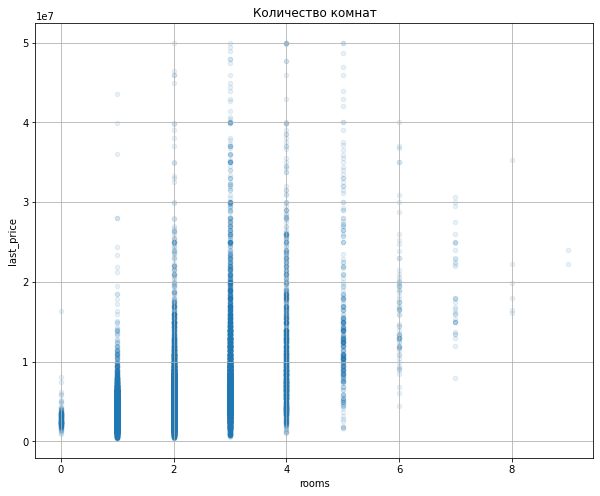

In [124]:
data.plot(x='rooms',
          y='last_price',
          kind='scatter',
          grid=True,
          figsize=(10, 8),
          alpha=0.1,
          title='Количество комнат')
plt.show()

In [125]:
round(data['rooms'].corr(data['last_price']), 2)

0.49

**Корряляция доволно слабая, но она есть. Коэффициент равен 0,49. Если посмотреть на график, довольно хорошо она проявляется для квартир с количеством комнат от 0 по 3, чем больще количество комнат, тем выше цена. Далее идёт разброс значений.**

#### Этаж по категории.

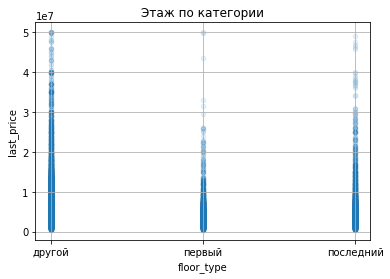

In [126]:
data.plot(x='floor_type',
          y='last_price',
          kind='scatter',
          grid=True,
          alpha=0.1,
          title='Этаж по категории')
plt.show()

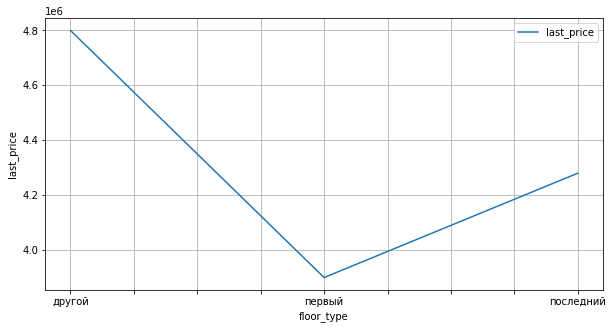

In [127]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot(y='last_price',
                                                                                  grid=True,
                                                                                  figsize=(10, 5),
                                                                                  ylabel='last_price')

plt.show()

**Если посмотреть на графики, то да, зависимость присутствует. Самый дешёвый - первый этаж, затем - последний и самый дорогой - "другой".**

#### Дата размещения объявления.

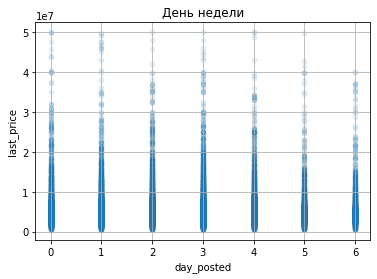

In [128]:
data.plot(x='day_posted',
          y='last_price',
          kind='scatter',
          grid=True,
          alpha=0.1,
          title='День недели')
plt.show()

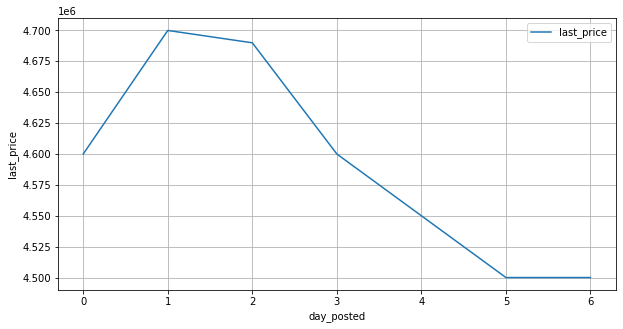

In [129]:
data.pivot_table(index='day_posted', values='last_price', aggfunc='median').plot(y='last_price',
                                                                                  grid=True,
                                                                                  figsize=(10, 5),
                                                                                  ylabel='last_price')

plt.show()

**Мы видим, что график идёт то вверх, то вниз. И, хотя, присутствует совсем маленькая отрицательная корреляция со среды по субботу, разброс цен при таких величинах, практически отсутствует, то есть корреляция почти нулевая. По данному параметру зависимость отсутствует.**

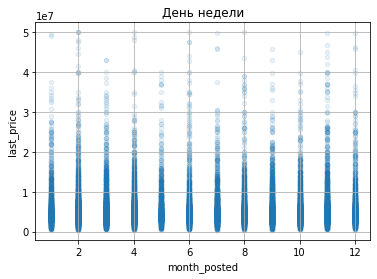

In [130]:
data.plot(x='month_posted',
          y='last_price',
          kind='scatter',
          grid=True,
          alpha=0.1,
          title='День недели')
plt.show()

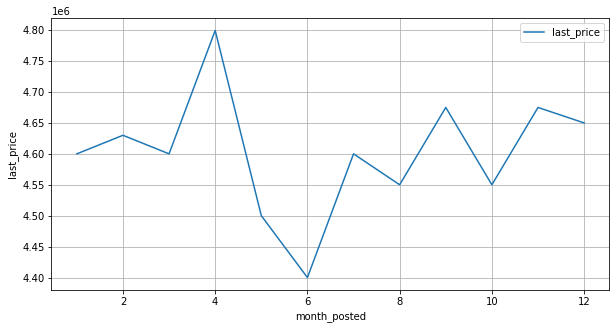

In [131]:
data.pivot_table(index='month_posted', values='last_price', aggfunc='median').plot(y='last_price',
                                                                                  grid=True,
                                                                                  figsize=(10, 5),
                                                                                  ylabel='last_price')

plt.show()

**Ситуация похожая график идёт то вверх, то вниз. По данному параметру зависимость отсутствует.**

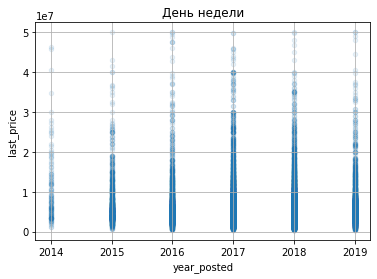

In [132]:
data.plot(x='year_posted',
          y='last_price',
          kind='scatter',
          grid=True,
          alpha=0.1,
          title='День недели')
plt.show()

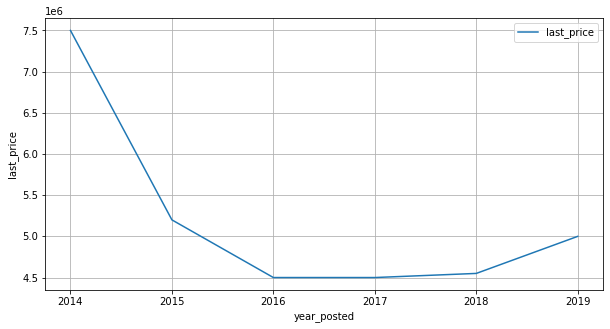

In [133]:
data.pivot_table(index='year_posted', values='last_price', aggfunc='median').plot(y='last_price',
                                                                                  grid=True,
                                                                                  figsize=(10, 5),
                                                                                  ylabel='last_price')

plt.show()

**Почти тоже самое. Присутствует совсем маленькая отрицательная корреляция, корреляция стремится к нулю. По данному параметру зависимость отсутствует.**

**Почему такие скачки по ценам? Если посмотреть на скрин ниже, можно увидеть, что графики цен на квариры и уровень инфляции с 2014 по 2019 годы практически идентичны.**

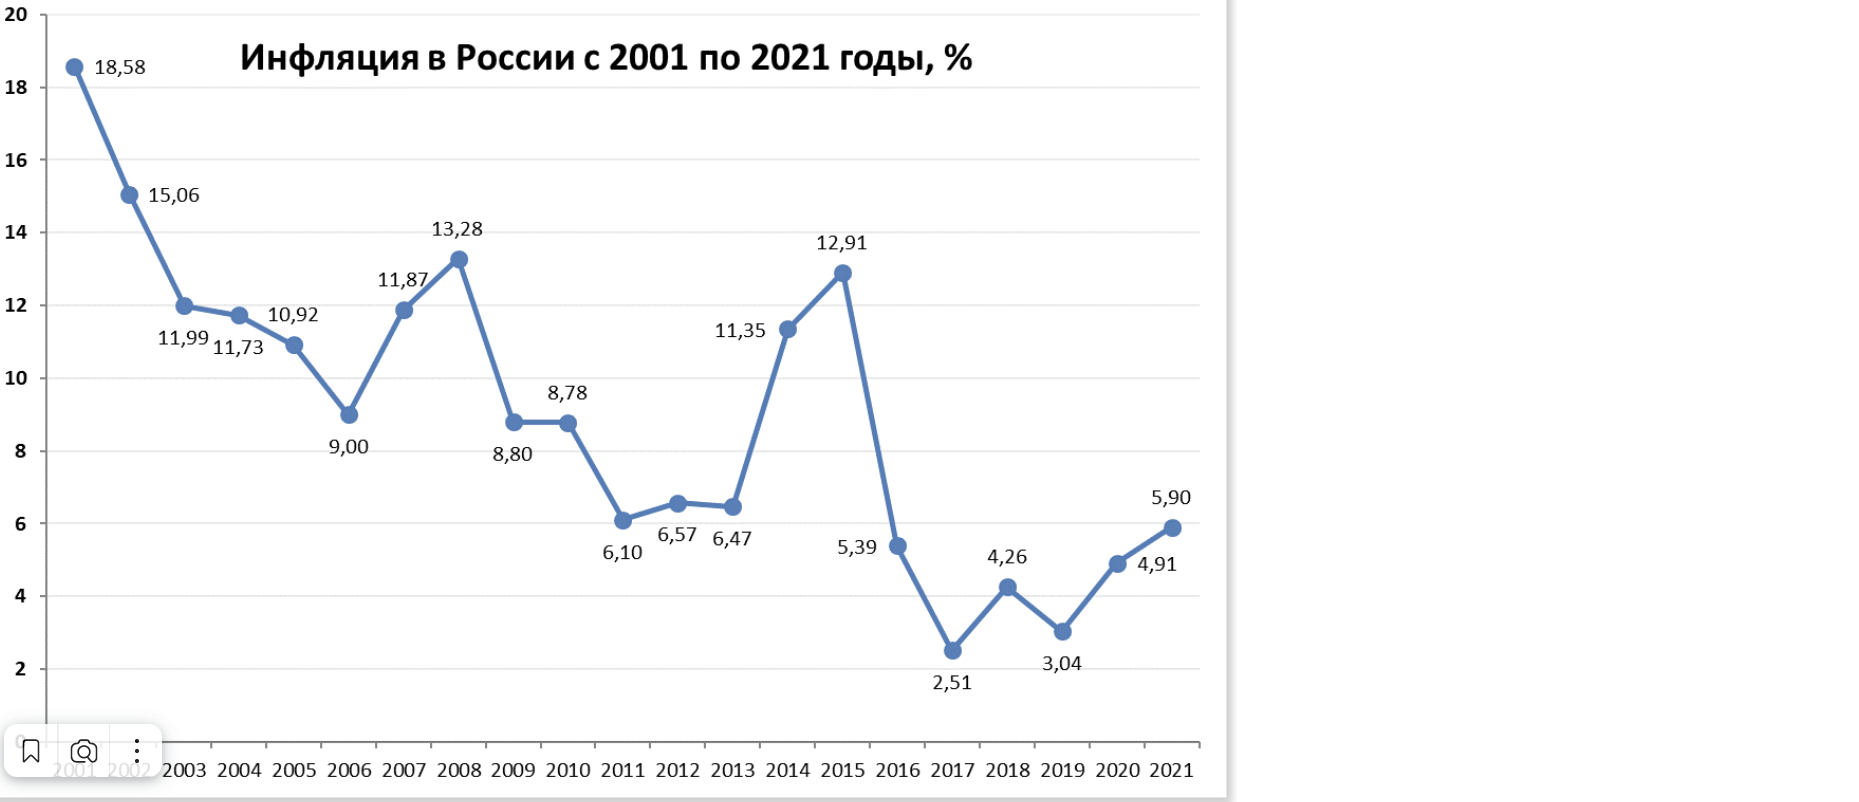

**А, вообще, если посмотреть на таблицу корреляции и матрицу диаграмм рассеивания, то зависимости можно увидеть в них (по крайней мере для количественных переменных).**

In [134]:
# возьмём столбцы, которые нужно проанализировать
col_analyze = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms',
    'day_posted',
    'month_posted',
    'year_posted']

In [135]:
data[col_analyze].corr()

,last_price,total_area,living_area,kitchen_area,rooms,day_posted,month_posted,year_posted
last_price,1.00,0.77,0.65,0.57,0.49,-0.02,0.00,-0.04
total_area,0.77,1.00,0.91,0.56,0.79,-0.01,0.01,-0.08
living_area,0.65,0.91,1.00,0.35,0.88,-0.01,-0.00,-0.07
kitchen_area,0.57,0.56,0.35,1.00,0.22,-0.01,0.01,-0.06
rooms,0.49,0.79,0.88,0.22,1.00,-0.01,-0.00,-0.05
day_posted,-0.02,-0.01,-0.01,-0.01,-0.01,1.00,0.01,-0.00
month_posted,0.00,0.01,-0.00,0.01,-0.00,0.01,1.00,-0.27
year_posted,-0.04,-0.08,-0.07,-0.06,-0.05,-0.00,-0.27,1.00


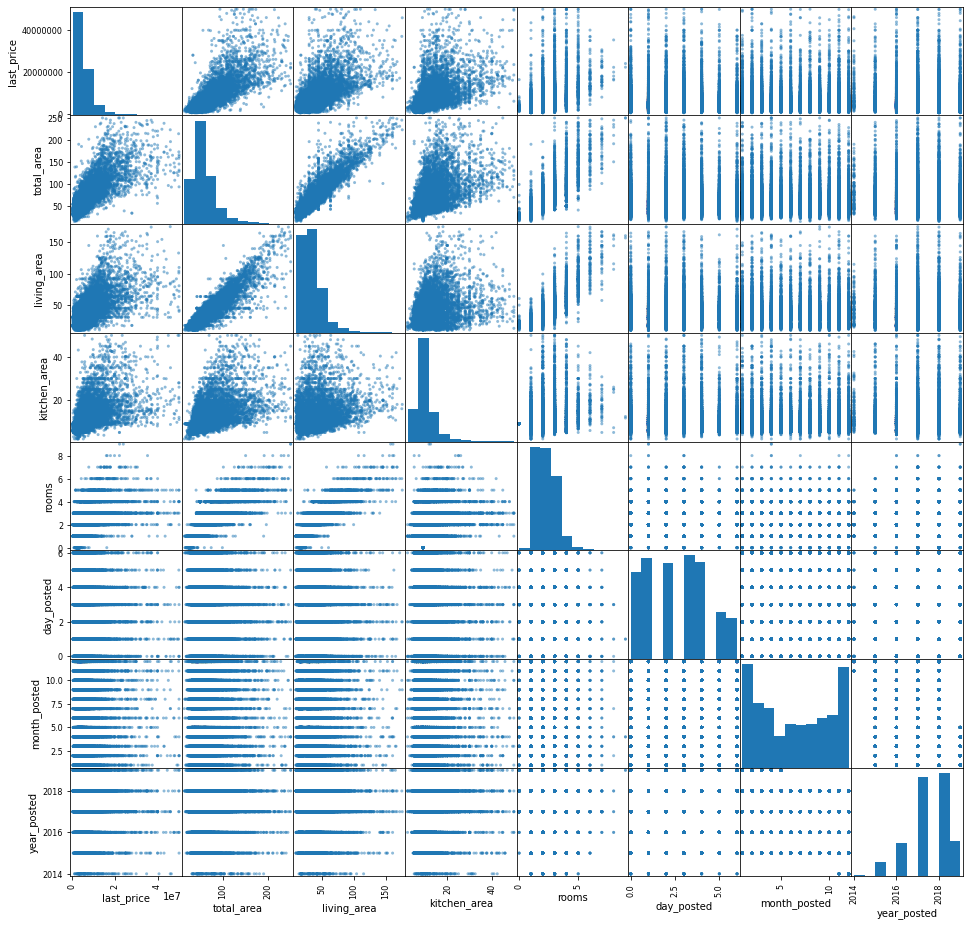

In [136]:
pd.plotting.scatter_matrix(data[col_analyze], figsize=(16, 16)) 
plt.show()

**Общий вывод по пункту 4.3.:**   
     
*Рассмотрели зависимость цены от других показателей*    
Существует зависимость цены от (показатели от большего к меньшему):
1. общей площади    
2. жилой площади    
3. площади кухни         
4. количества комнат
5. этажа, на котором расположена квартира (первый, последний, другой)     
      
Отсутствует зависимость от даты размещения (день недели, месяц, год).

### Считаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [137]:
loc_sqr_mean = data.pivot_table(index='locality_name', values='price_sqm', aggfunc={'count', 'mean'}) \
.sort_values('count', ascending=False).head(10)
# переименуем столбцы для удобства
loc_sqr_mean.columns = ['Количество объявлений', 'Цена 1 м²']
loc_sqr_mean

,Количество объявлений,Цена 1 м²
locality_name,,
Санкт-Петербург,15339,112070.50
поселок Мурино,551,85601.12
поселок Шушары,438,78577.01
Всеволожск,396,68670.46
Пушкин,360,102880.92
Колпино,336,75352.48
поселок Парголово,326,90205.42
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


**Мы выбрали 10 населённых пунктах с наибольшим числом объявлений и посчитали среднюю цену 1 м². Отсортируем таблицу по стомости за 1 м² в порядке убывания и визуализируем её.**

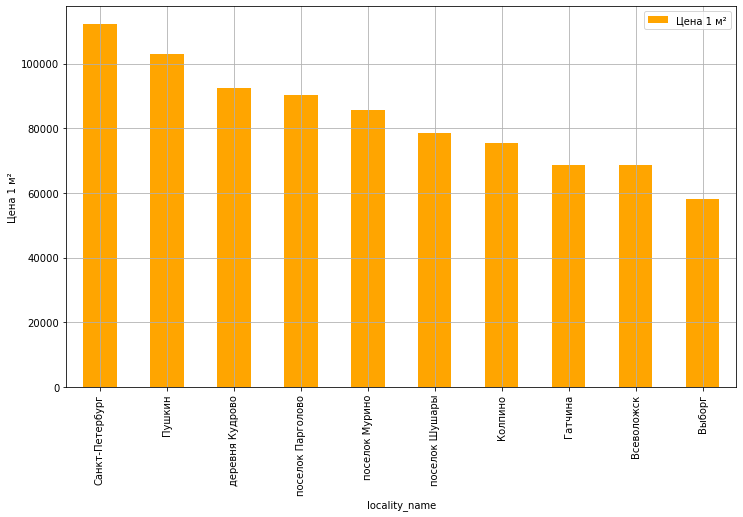

In [138]:
loc_sqr_mean.sort_values('Цена 1 м²', ascending=False).plot(y='Цена 1 м²', 
                                                            kind='bar',
                                                            grid=True,
                                                            figsize=(12, 7),
                                                            ylabel='Цена 1 м²',
                                                            legend=True,
                                                            color='orange')
plt.show()

**Вывод по пункту 4.4.:      
Из 10 населённых пунктах с наибольшим числом объявлений максимальная стоимость за 1 м² в Санкт-петербурге, минимальная в Выборге.**

### Как стоимость объектов зависит от расстояния до центра города.

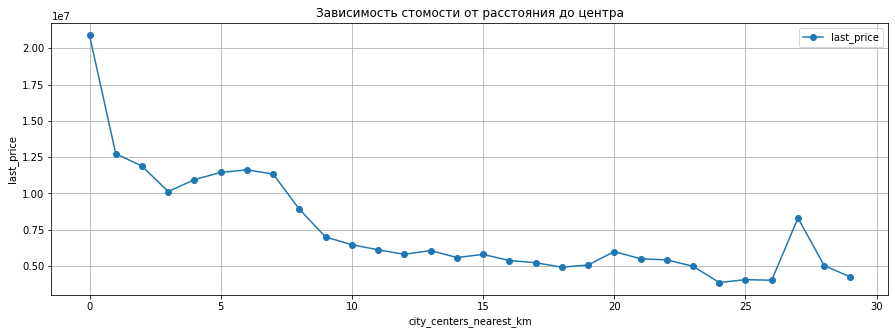

In [139]:
# окрунлим расстояние до целых чисел
data['city_centers_nearest_km'] = round(data['city_centers_nearest_km'])
# создадим фрейм только с Санкт-Петербургом
df_spb = data.query('locality_name == "Санкт-Петербург"')
(
    # создадим сводную таблицу цены от расстояния и построим график
    df_spb.pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(y='last_price', 
          grid=True, 
          figsize=(15, 5), 
          ylabel='last_price',
          style='o-',
          title='Зависимость стомости от расстояния до центра')
)
plt.show()

In [140]:
# посчитаем коэффициент корреляции
df_spb['city_centers_nearest_km'].corr(df_spb['last_price'])

-0.4058175632571255

**Квартиры в самом центре менее 1 км - очень дорогие (конечно не очень понятно откуда считается, ведь центральный район довольно большой). Подъём на 27 км может означать наличие там элитного коттеджного посёлка. На графике, а также при расчете коэффициента мы видим отрицательную корреляцию, хотя, и не сильно явную. То есть если одно значение увеличивается (цена), другое уменьшается (расстояние).**

## Общий вывод

**В пункте 1:**    
+ изучили основные проблемы в данных   
     
**В пункте 2:**
1. Исправим названия столбцов     
2. Обработаны пропуски:        
3. Изменены типы данных:      
4. Обработаны неявные дубликаты в названии населённых пунктов. Количество уникальных названий было сокращено с 364 до 318    
5. Обработаны аномальные значения и выбросы   
     
**В пункте 3:**    
+ Произвели расчеты и добавили в таблицу шесть новых столбцов    
     
**В пункте 4:**    
     
+ Проанализировали параметры объектов недвижимости. Выявили праметры среднестатистической квартиры.   
+ Выявили быстрые продажи - менее 45 дней и долгие - более 230 дней.    
+ Выявили зависимость цены от других показателей.    
+ Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.  + Посчитали как стоимость объектов зависит от расстояния до центра города.¶    
         
**Вывод:**     
Существует зависимость цены от:
1. общей площади    
2. жилой площади    
3. площади кухни         
4. количества комнат
5. этажа, на котором расположена квартира (первый, последний, другой)   
6. локация квартиры.
7. удалённость от центра города.    

**Значит при совмещении двух и более параметров мохно делать оценку о стоимости квартиры. Чем больше параметров совместить, тем точнее будет оценка стомости.**